## Business problem

INX Future Inc, is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. In recent years, the employee performance indexes are not healthy and this has become a growing concern among the top management. The CEO Mr. Brain, decided to initiate a data science project, which analyzes the current employee data and find the core underlying causes of the performance issues. He also expects a clear indicators of non-performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.

so I need to analyse the data and factors affecting the employee performance with suitable ideas to boost the employee performance.Along with that building a trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees.

# Employee Performance Analysis
### INX Future Inc.


In [1]:
#importingt the libraries
import warnings
warnings.filterwarnings('ignore') 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load Data

In [2]:
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8 (1).xls')

In [3]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0                   10                  3                           4   
1                   14                  4                           4   
2                    5                  4                           4   
3                   10                  4                           2   
4                   16                  4                           1   
...                ...                ...                         ...   
1195                 3                  1                           4   
1196                10                  2                           4   
1197                28                  1                           4   
1198                 9                  3                           4   
1199                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                      1       No                        12   
1                      2       No                        12   
2                      5      Yes                        21   
3                      3       No                        15   
4                      8       No                        14   
...                  ...      ...                       ...   
1195                   1      Yes                        20   
1196                   3       No                        17   
1197                   1      Yes                        11   
1198       

### Basic checks

In [6]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [7]:
data.head()

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [8]:
data.tail(2)

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

           EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1198   Data Scientist           Travel_Rarely                 9   
1199  Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
1198                  2            3                   2                   1   
1199                  3            2                   3                   9   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
1198       No                        14                            2   
1199       No                        14                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager Attrition  \
1198                        7                     7        No   
1199                        2                     0       Yes   

      PerformanceRating  
1198                  3  
1199                  2

In [9]:
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [10]:
data.isnull().sum()
# no null datas are present

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [11]:
data.shape

(1200, 28)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

### Domain Analysis

EmpNumber:(type:object)=> It represents a unique identification number of a employee.

Age:(type: int) => Age of the employee in years.

Gender:(type:object)=>Represnts the sex of the employee ie. female and male.

EducationBackground:(type:object)=>It represents the field of education the employee have.

MaritalStatus:(type:object)=>It shows the marital status of employee like married,single and divorced.

EmpDepartment:(type:object)=> It shows the department on which the employee currently working for.

EmpJobRole:(type:object)=> It represents the position and job-role in which the employee is working.

BusinessTravelFrequency:(type:object)=>It shows the type of travelling the job need like non-travel type,frequent travel type or                                        rare travel type 

DistanceFromHome:(type: int) => It shows the distance of the office from the place of employee.

EmpEducationLevel: (type: int) =>It shows the education level of the employee from the scale of 1-5.

EmpEnvironmentSatisfaction(type: int) =>Represents satisfaction of employee with the working environment from the scale of 1-4.

EmpHourlyRate:(type: int) => Represents the remmuneration per hour.

EmpJobInvolvement:(type: int) =>Shows the involvement of the employee with the job,measured from the scale of 1-4. 

EmpJobLevel:(type: int) =>Job levels, also known as job grades and classifications, set the responsibility level and                                       expectations of roles at the organization.classified from the scale of 1-5.

EmpJobSatisfaction:(type: int) => Job satisfaction or employee satisfaction is a measure of workers contentedness with their  
                                  job, whether they like the job or individual aspects or facets of jobs, such as nature of work                                   or supervision.Measured from the scale of 1-4.
NumCompaniesWorked: (type: int) =>shows the total number of companies the employee worked for till date.

OverTime:(type:object)=>Shows whether the employee work for over time or not.

EmpLastSalaryHikePercent:(type: int) => It shows the percentage of salary hiked previously.

EmpRelationshipSatisfaction:(type: int) =>Represents the relationship among the employees and the management.Measured from the   
                                          scale of 1-4
TotalWorkExperienceInYears:(type: int) => It shows the total experience the employee have.

TrainingTimesLastYear:(type: int) =>Number of time the employee traind last year from 0-6 times

EmpWorkLifeBalance: (type: int) =>Work-life balanc typically means the achievement by employees of equality between time spent                                     working and personal life. A good work-life balance for employees can improve staff                                             motivation, increase staff retention rates, reduce absence, attract new talent, and reduce                                       employee stress.This is measured in a scale of 1-4.

ExperienceYearsAtThisCompany:(type: int) =>Shows number of years the the employee currently working in this company.

ExperienceYearsInCurrentRole:(type: int) => Shows number of years the the employee  working in a given role.

YearsSinceLastPromotion:(type: int) =>It represents the years since the employee promoted.

YearsWithCurrManager:(type: int) => It shows number of years the employee works under a Manager.

Attrition:(type:object)=> Attrition is the departure of employees from the organization for any reason (voluntary or                                       involuntary), including resignation, termination, death or retirement.

PerformanceRating:(type: int) =>It shows  employees productivity and engagement/devotion towards their work.It measured in the                                scale from 1-4.

## Exploratory Data Analysis

### Univariate Analysis


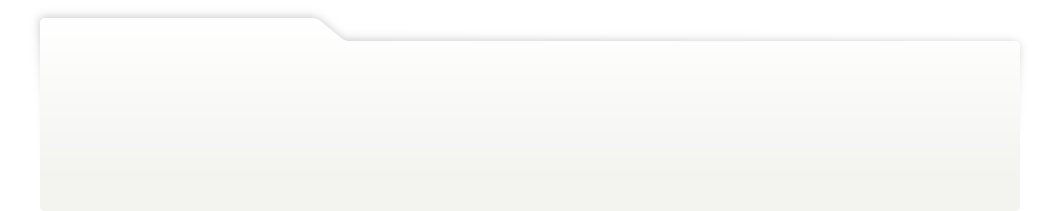
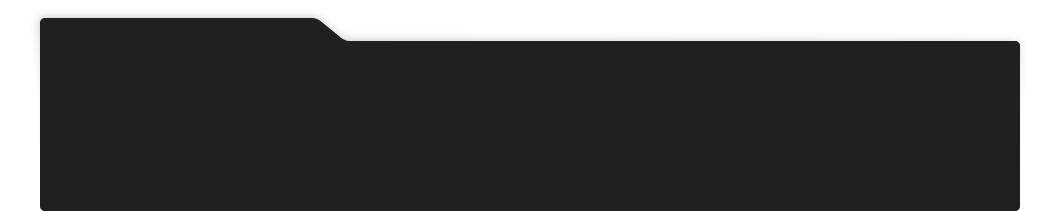
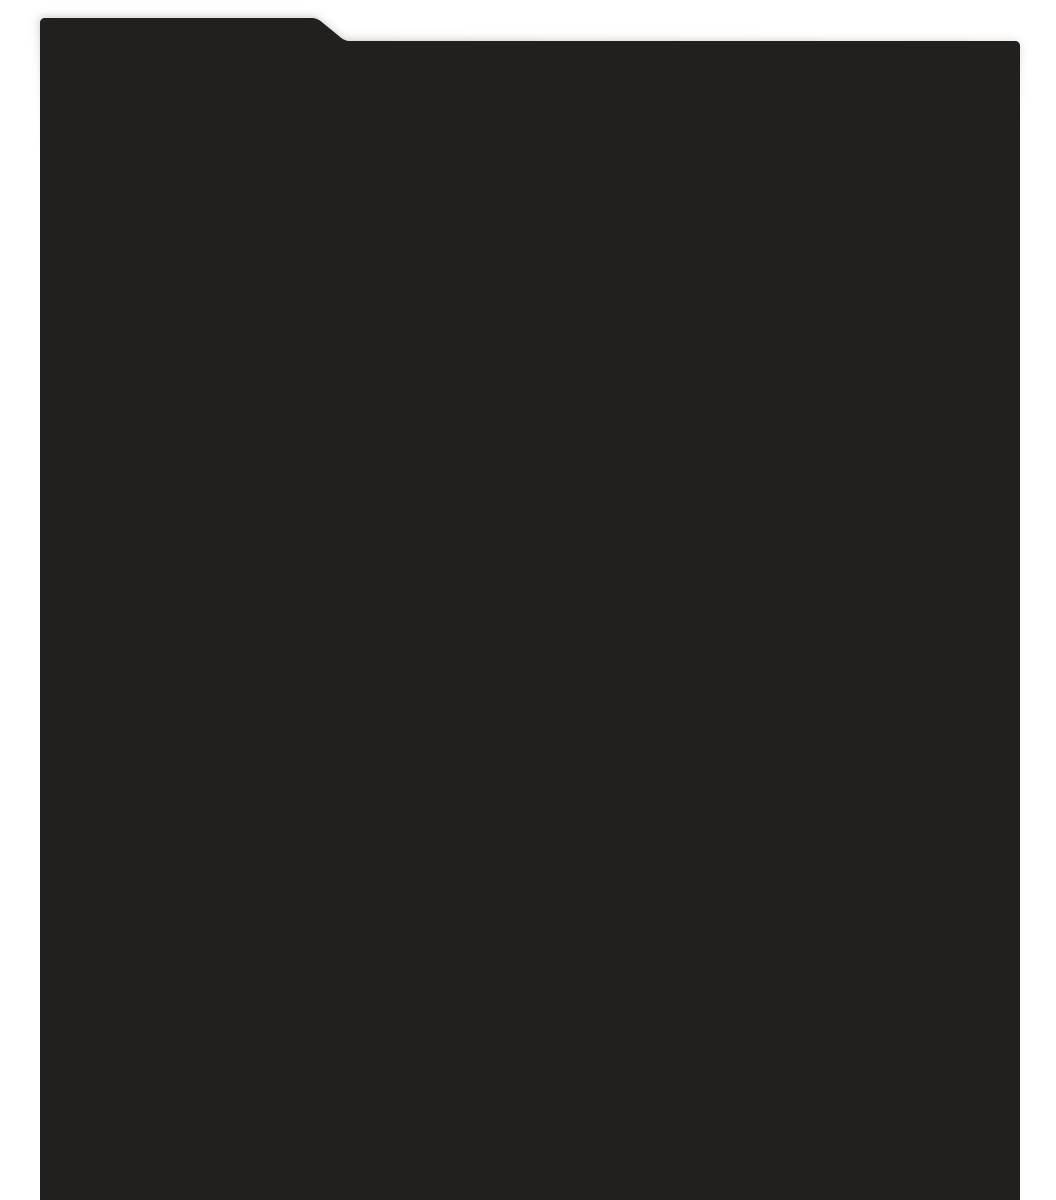
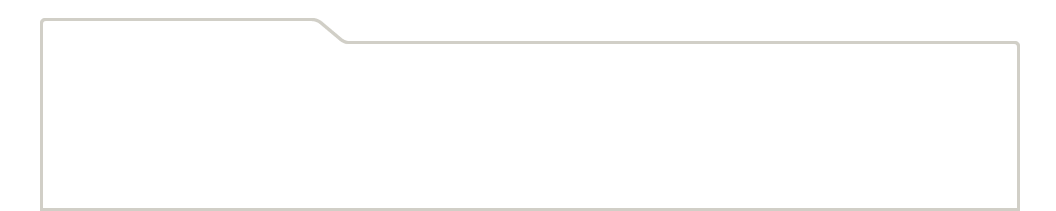
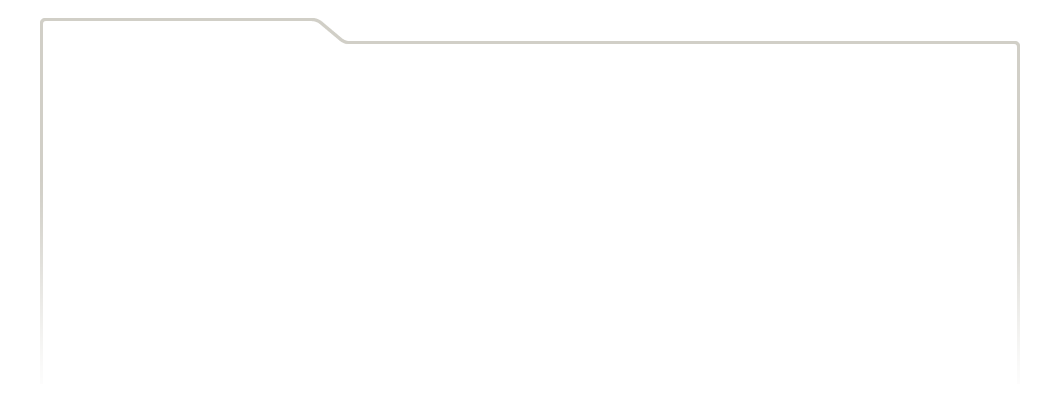
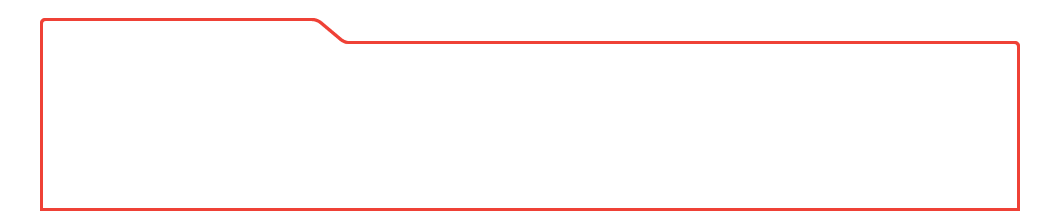
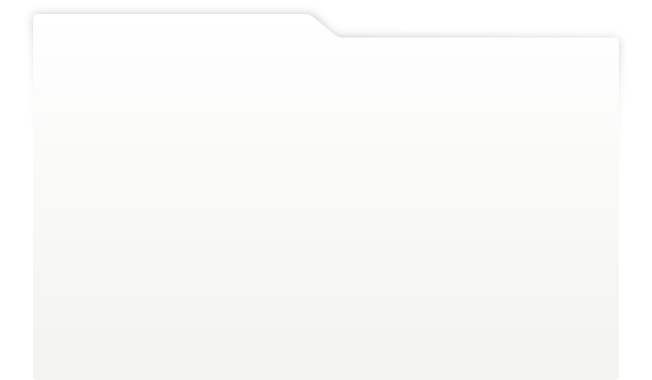
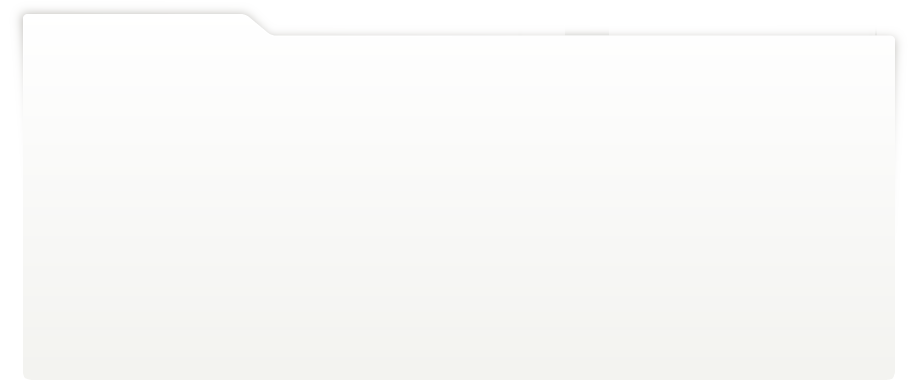
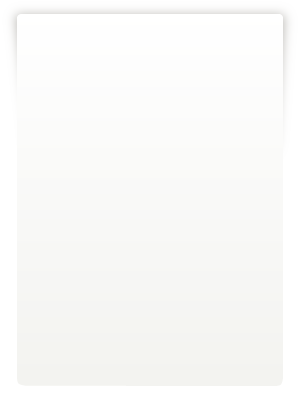
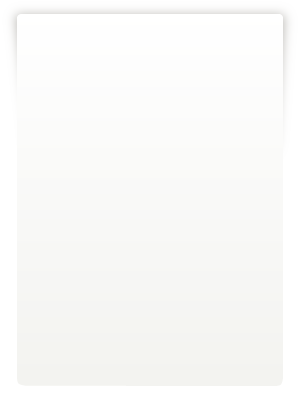
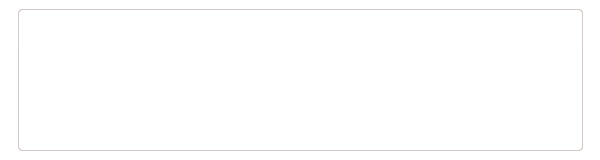
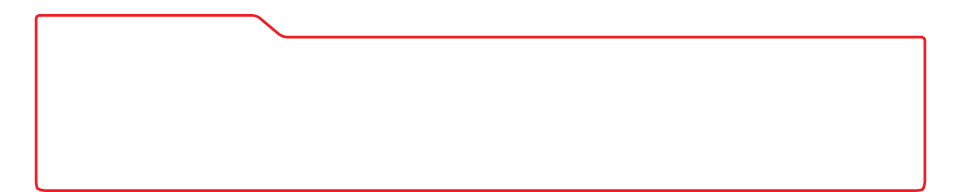
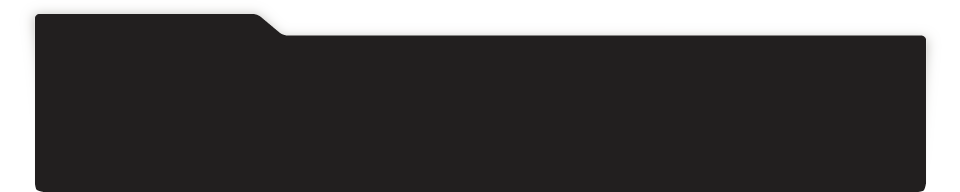
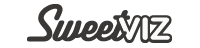
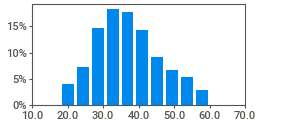
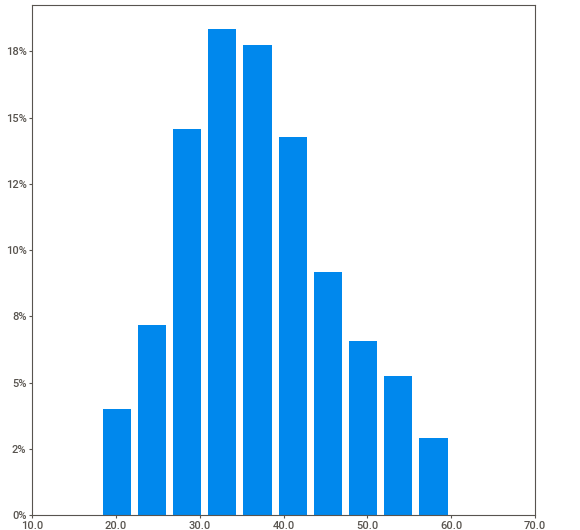
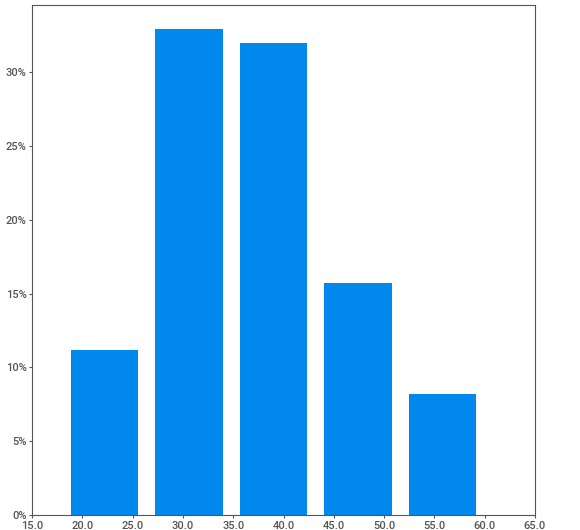
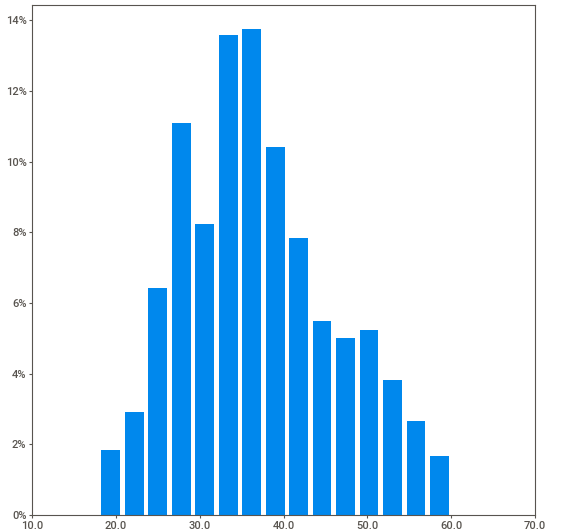
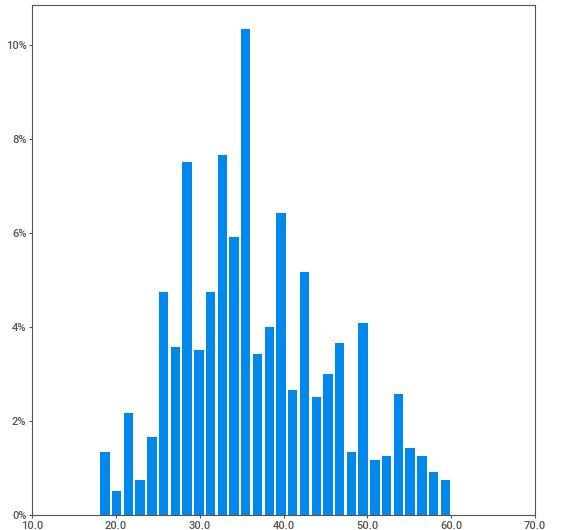
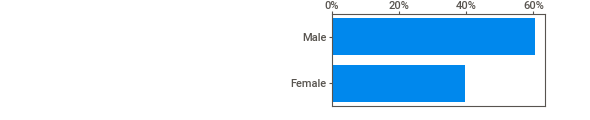
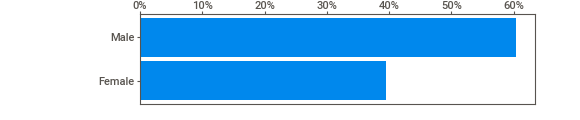
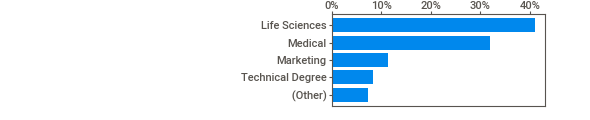
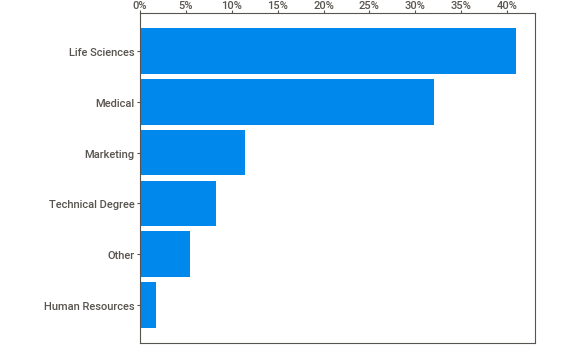
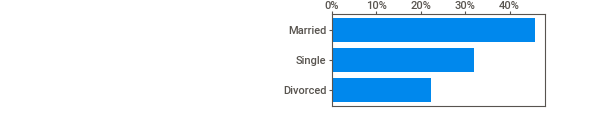
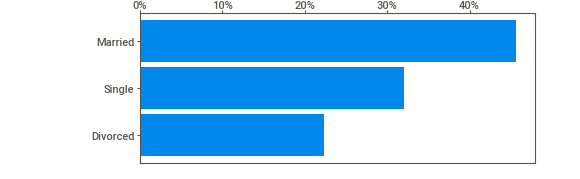
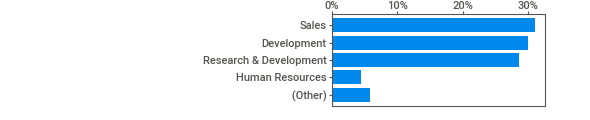
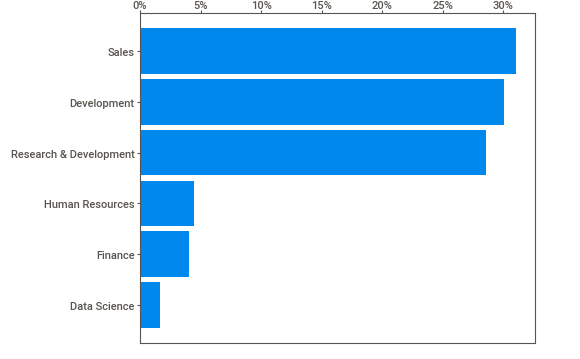
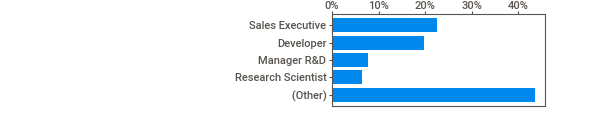
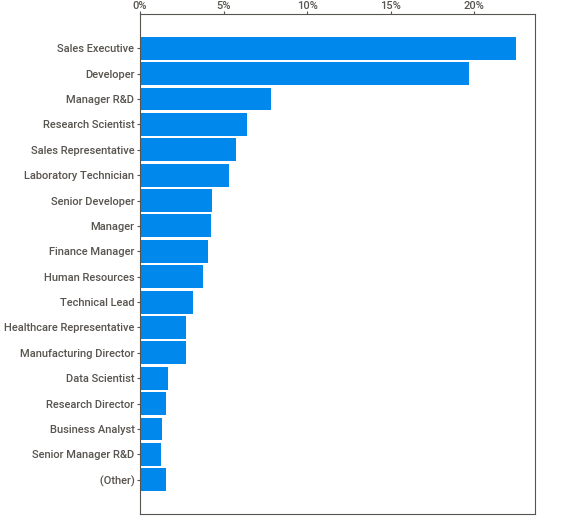
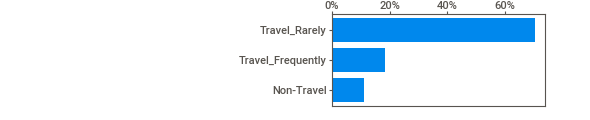
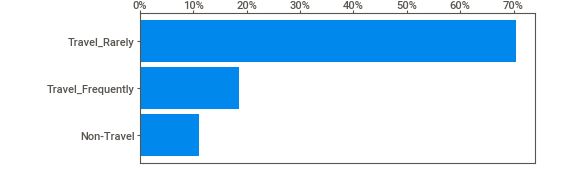
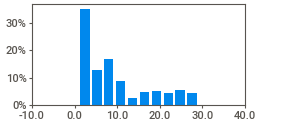
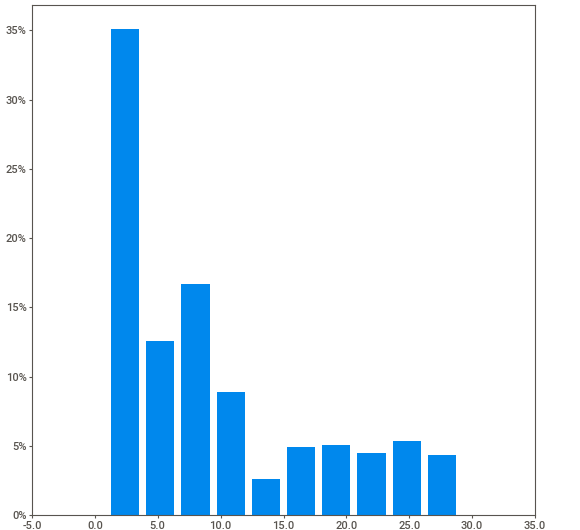
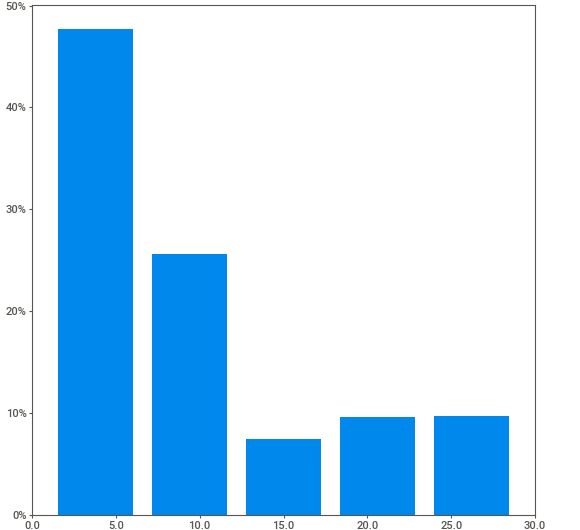
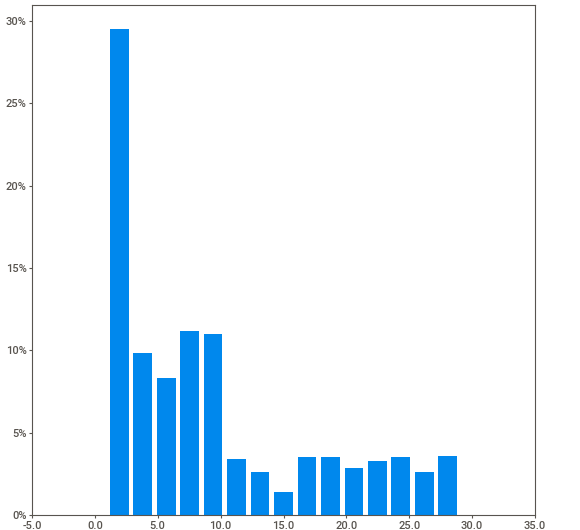
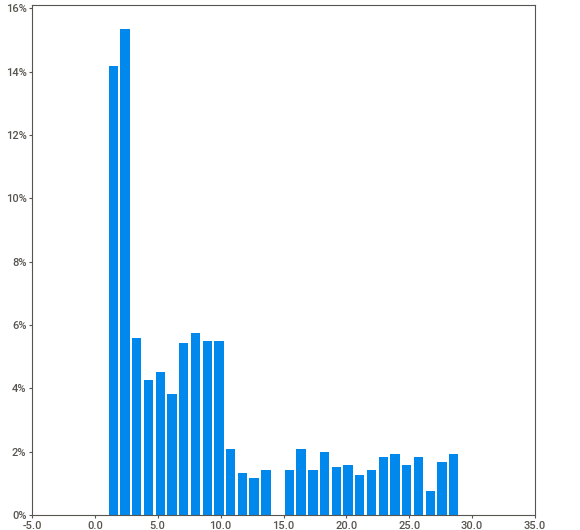
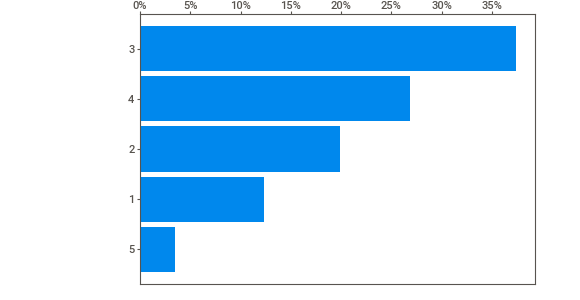
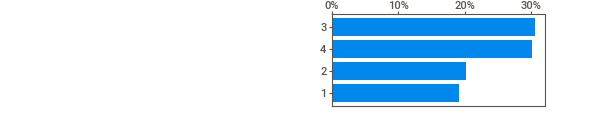
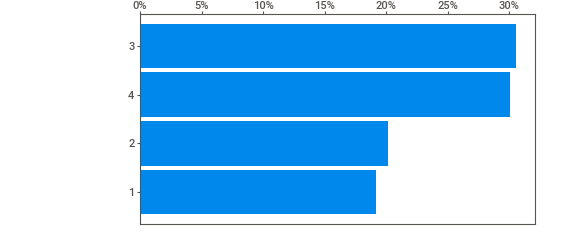
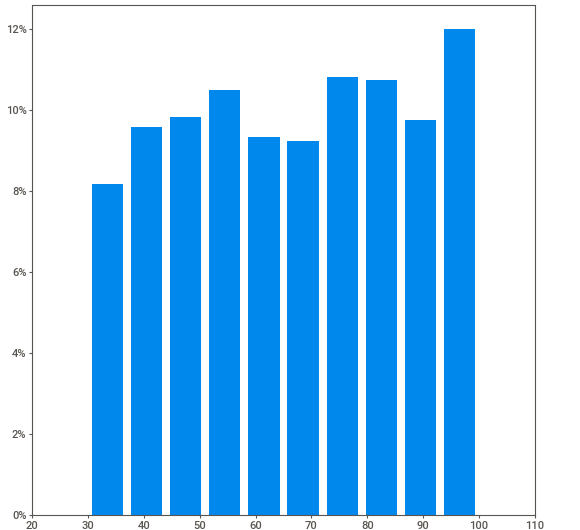
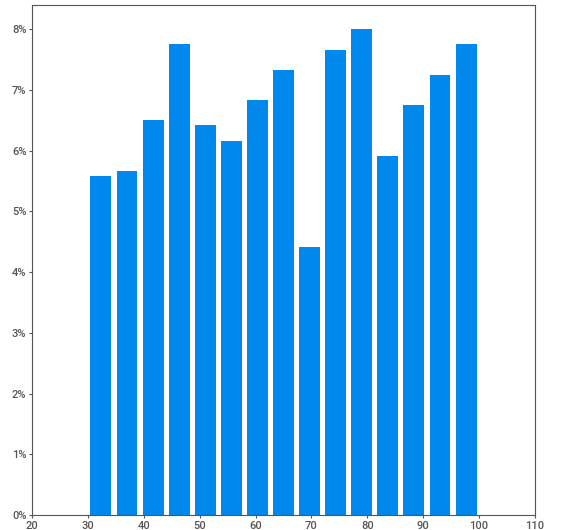
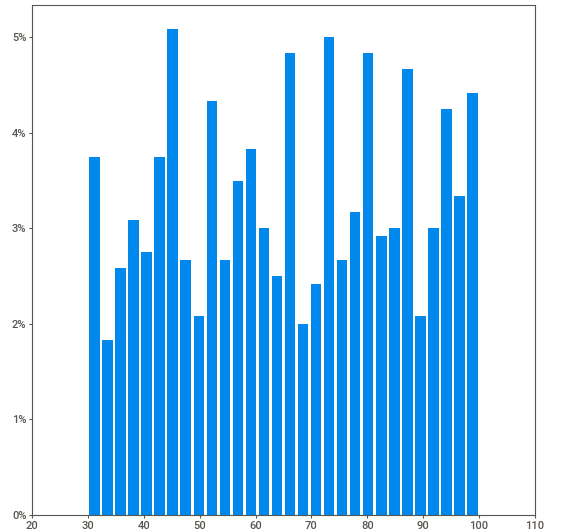
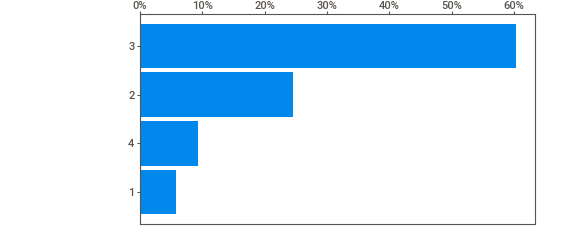
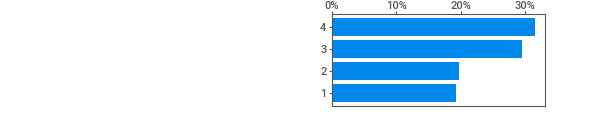
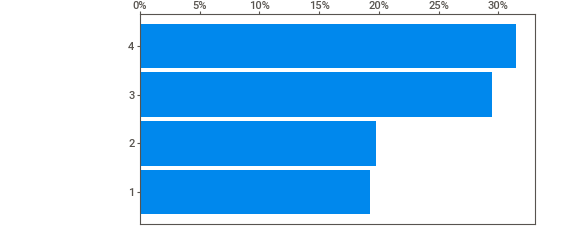
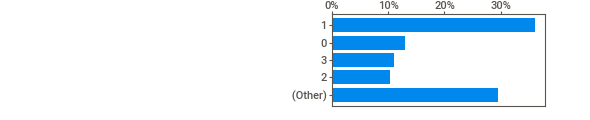
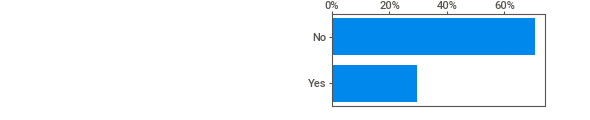
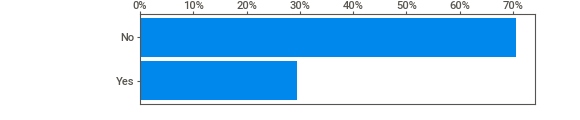
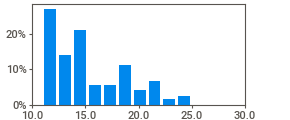
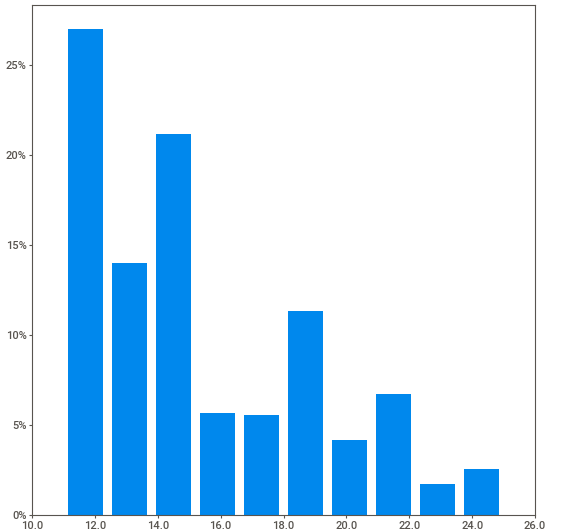
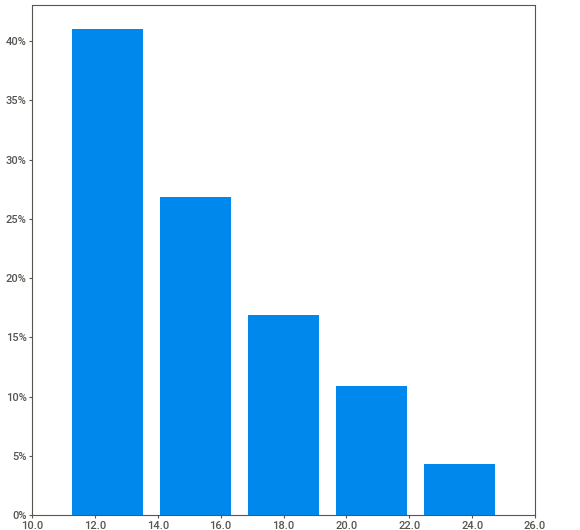
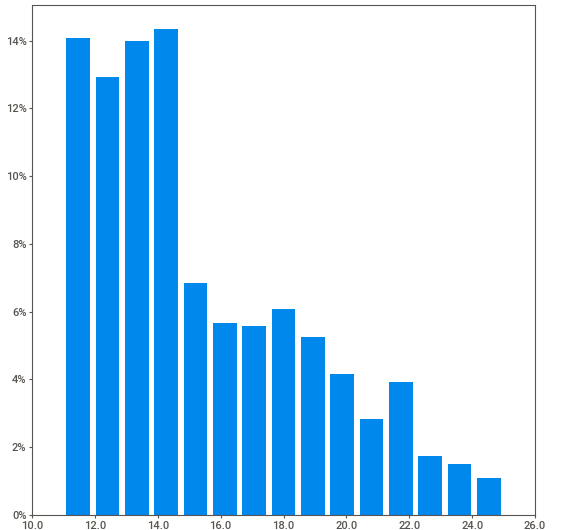
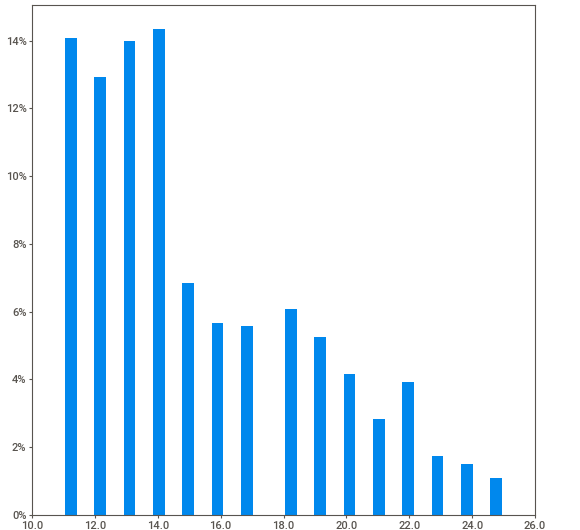
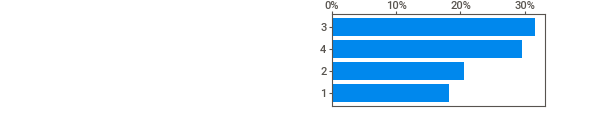
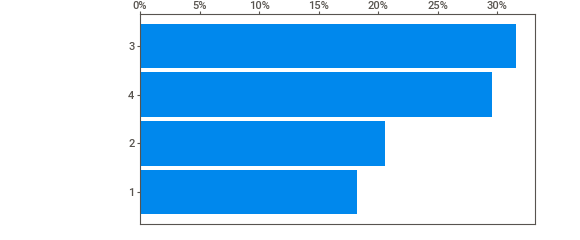
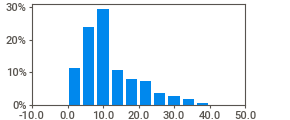
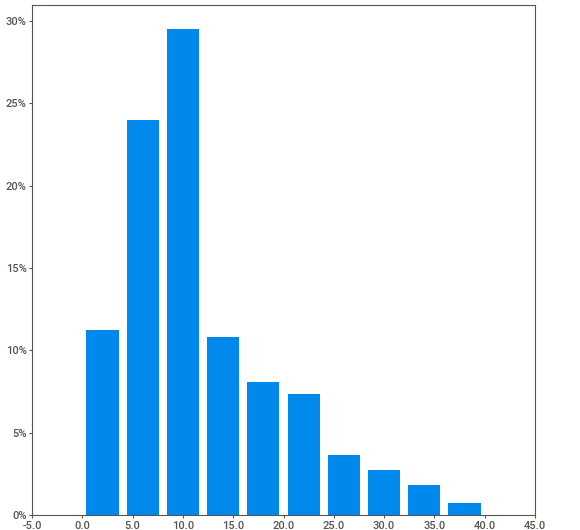
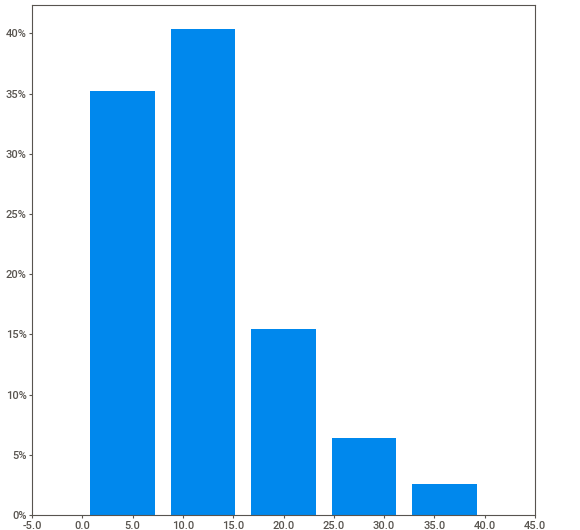
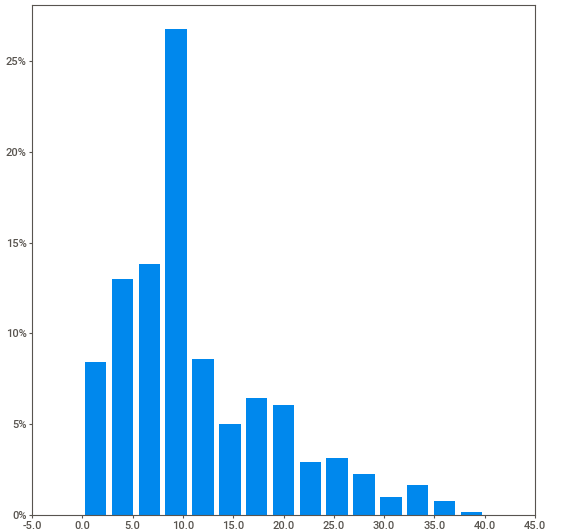
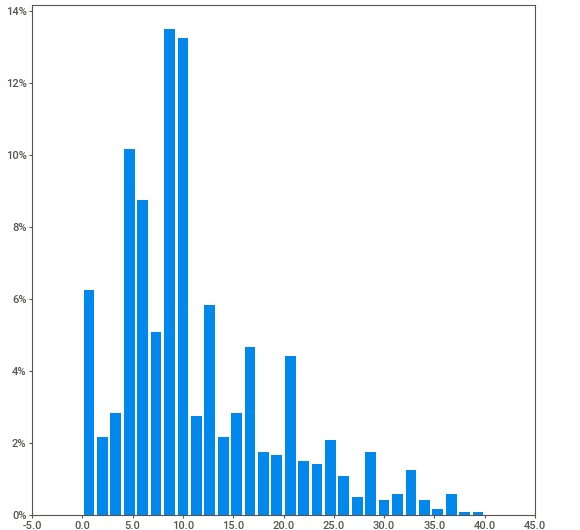
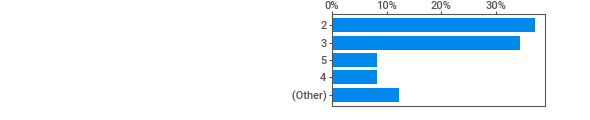
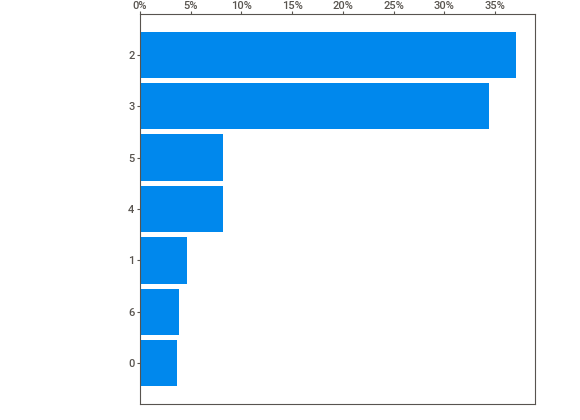
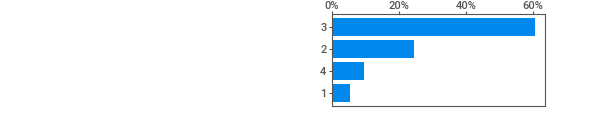
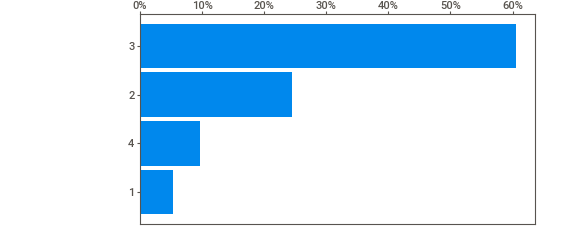
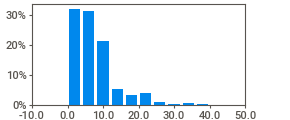
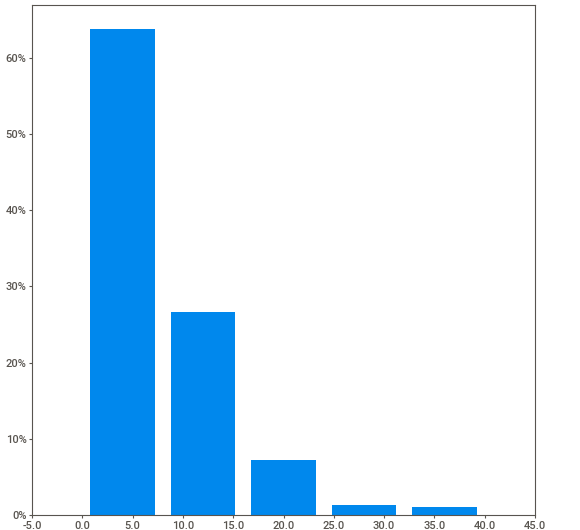
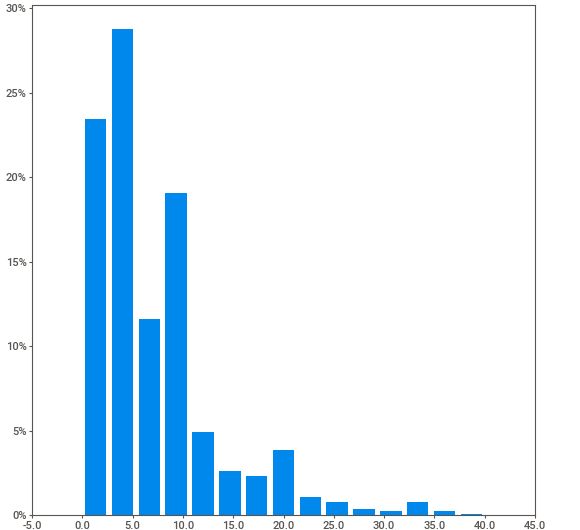
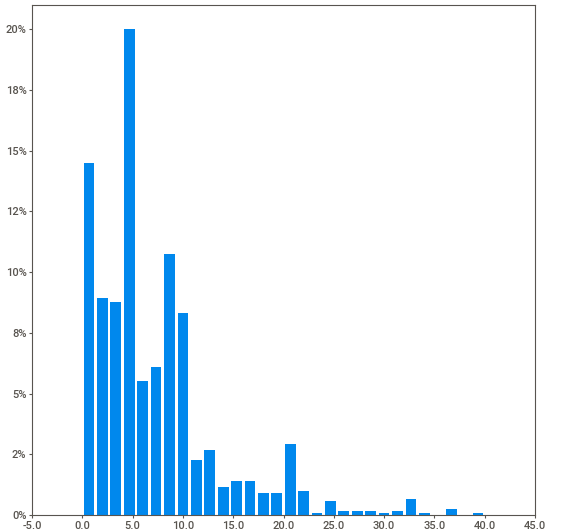
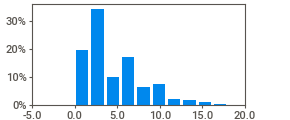
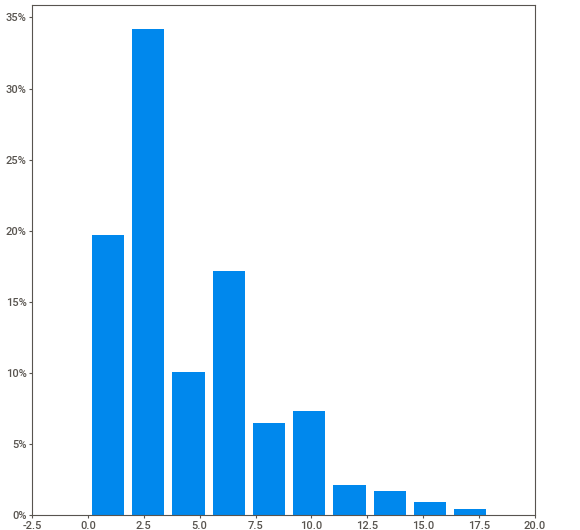
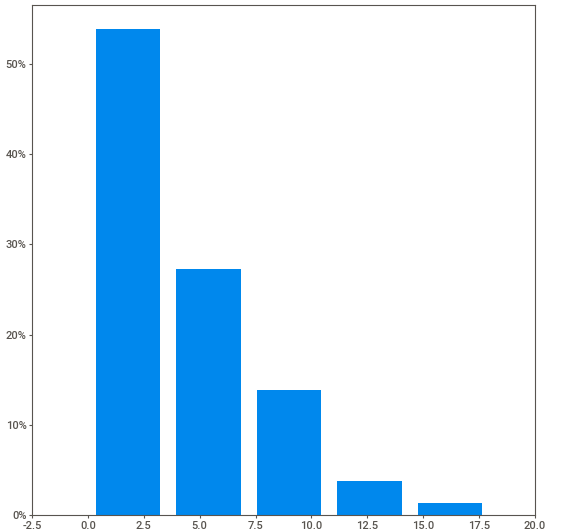
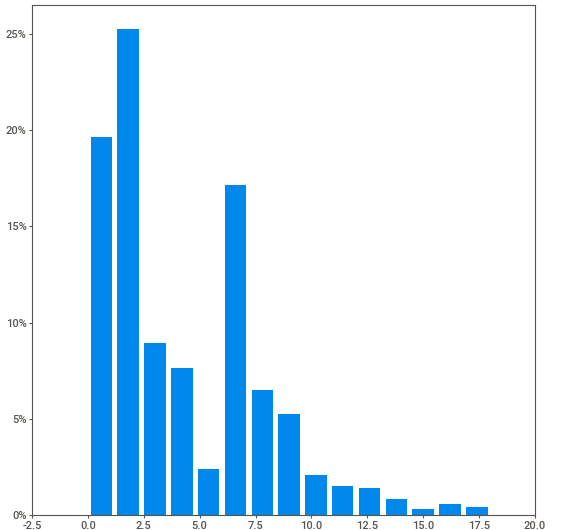
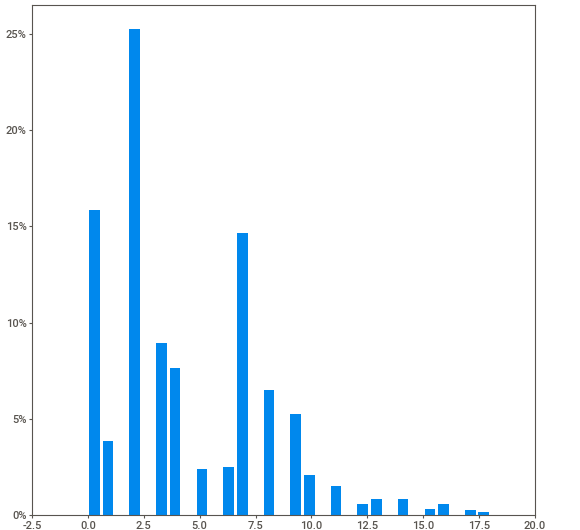
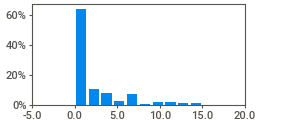
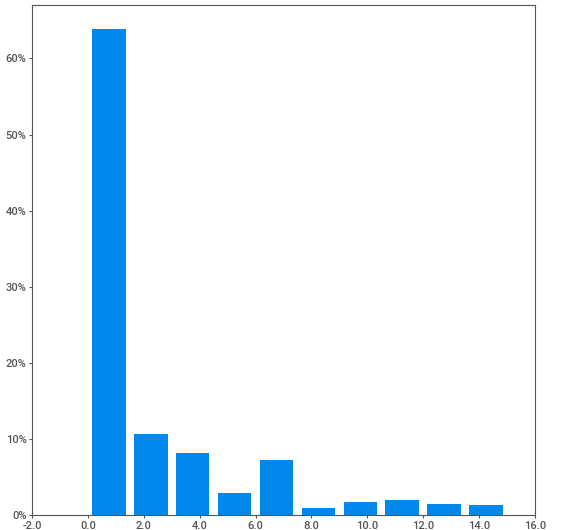
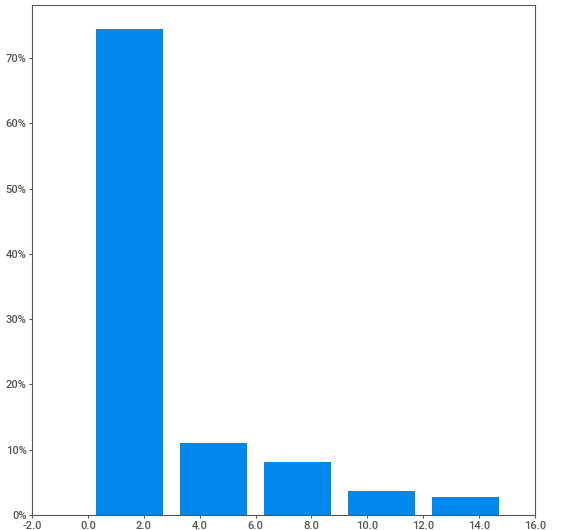
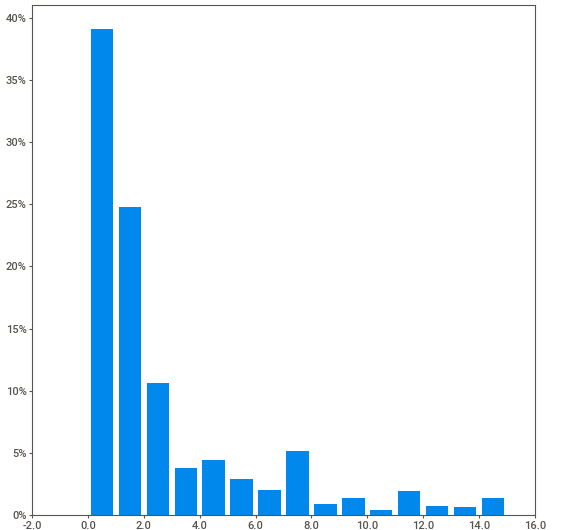
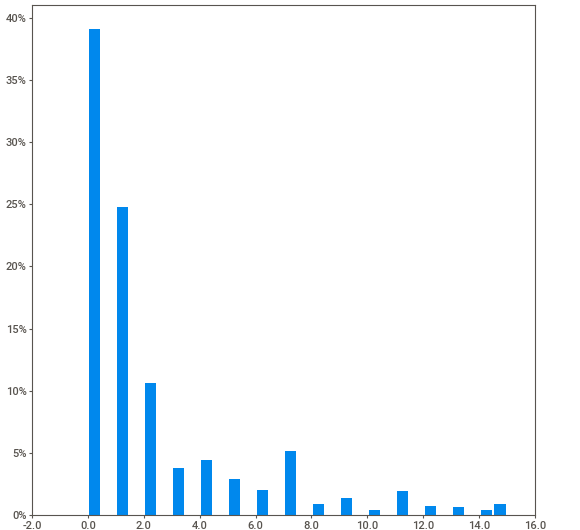
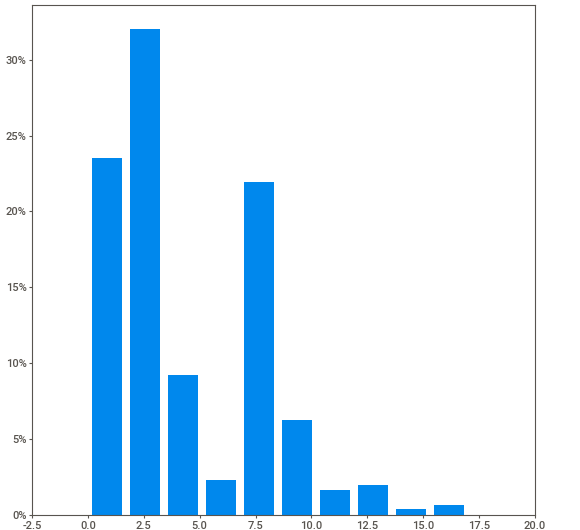
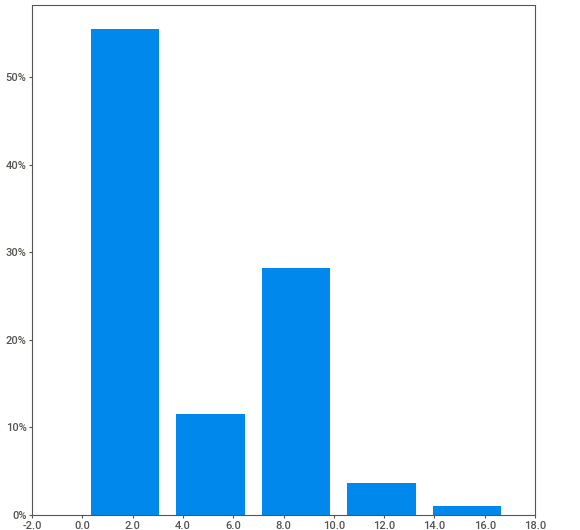
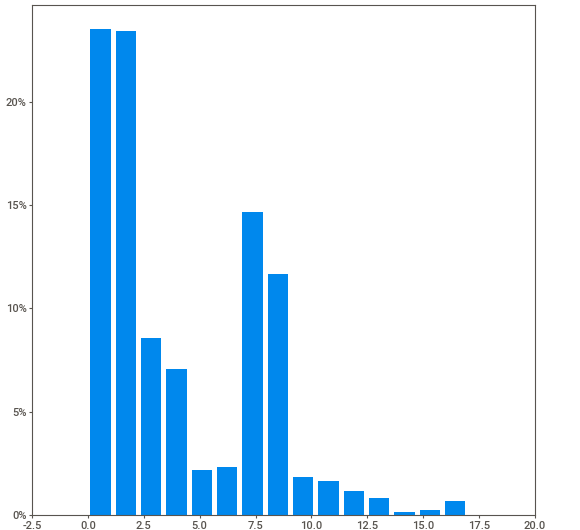
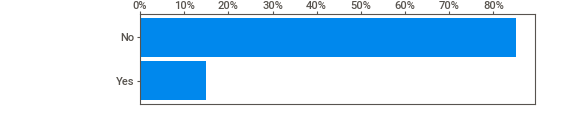
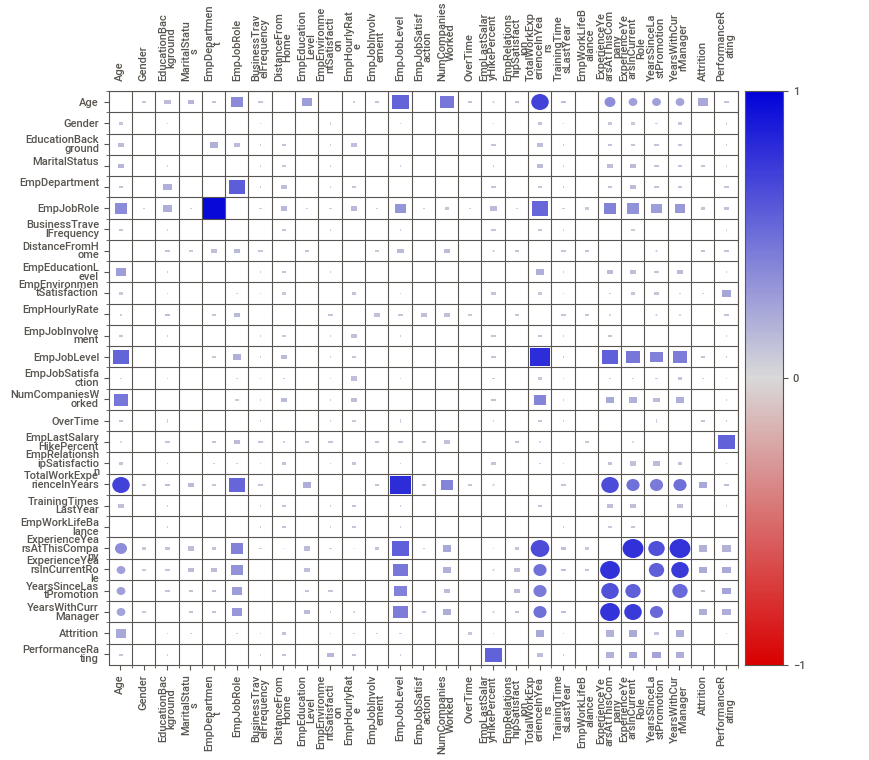
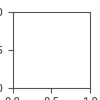

In [13]:
import sweetviz as sv
my_report=sv.analyze(data)
my_report.show_notebook()

## Insights

$ EmpNumber $
- It's a object type data which is unique identification number of a given employee.

$ Age $
- It's a numerical  type data. Almost 50% employees age lies in the range of 30-40 years. Only 12% employees age lies between 50-60,which shows the working population of company mostly between 20-50 years.
 
$ Gender $
- Out of total employees,60%  male and 40%  female employees are working for the company.


$ EducationBackground$
- Out of all employees 41% belongs to life science background,32% medical background,11% marketing background and 8% technical background employees are working for the company.Almost 92% belongs to these background only.

$ MaritalStatus $
- From the data 46% employees are married,32% employees are single and 22% employees are divorced.

$ EmpDepartment$
- 31% employees working in sales department,30% in development,29% in Research and development,both human resource and finance department constitute 4% employees separately and only 2% working on data science department.

$ EmpJobRole$
- 19 distinct features present for emp jobrole.22% employees are sales executive,20% employees are manager R&D. All job role type have less than 10% of the total employees.

$ BusinessTravelFrequency$
- 70% employees travel rarely.18% travel frequently and 11% employees are nontravel type.

$DistanceFromHome $
- 30% employees live only 1-2 km from the office,70-75% employees home are less than 10km from the office.

$ EmpEducationLeve $
- categorised from the scale of 1-5.More than 80% employees fit in the scale of 2-4.

$ EmpEnvironmentSatisfaction $
- categorised from the scale of 1-4.31% fit in class 3,30% in class 4,20% in class 2 and 19%  in class 1.

$ EmpHourlyRate $
- Employees hourly rate is quite different for different employees, on an average an employees get around 66 units .

$ EmpJobInvolvement $
- categorised from the scale of 1-4.60% given a score of 3,24% given a score of 2 and 9% given a score of 4.

$ EmpJobLevel $
- categorised from the scale of 1-5.37% belongs to the level of 2 and 1 separately, 14% belongs to the level of 3,8% belongs to the level of 4.

$ EmpJobSatisfaction $
- Measured from the scale of 1-4.32% belongs to scale 4,30% belongs to scale 3 and 20% belongs to scale 2 rest 19% belongs to scale 1.

$ NumCompaniesWorked $
- 50% employees are working for no or only 1 company previously.13% employees are freshers i.e hired by the company recently.

$ OverTime $
- About 29% employees work for overtime and 79% prefer not to work overtime. 

$ EmpLastSalaryHikePercent $
- The salary hike percentage lies in the range of 10-25%. The avearage salary hike is 15%.

$ EmpRelationshipSatisfaction $
- Measured from the scale of 1-4. 32% and 30% employees are lie in the scale of 3 and 4 rspectively shows they are quite satisfied with their co-employees. 21% and 18% prvide a score of 2 and 1 which shows their dissatisfaction.

$ TotalWorkExperienceInYears $
- More than 50% employees have work experience between 5-10 years.75% employees have experience between 0-15 years.

$ TrainingTimesLastYear $
- About 37% employees traind 2 times last year,34% employees trained 3 times and 16% employees traind 4 and 5 times last year. 

$ EmpWorkLifeBalance $
- Measured from the scale of 1-4.61% belongs to scale 3,24% belongs to scale 2 and 10% belongs to scale 4 rest 5% belongs to scale 1.

$ ExperienceYearsAtThisCompany $
- More than 60% employess works only for 0-5 years for this company.The average experience years for this company is 7.1 years.

$ ExperienceYearsInCurrentRole $
- More than 50% employees have less than 3 years of experience in their respective current roles.The average value is 4.1 years.

$ YearsSinceLastPromotion $
- 70% employees are present who promoted 1-2 years back.Apart from that for 30% employees promotion takes more than 2 years.

$ YearsWithCurrManager $
- About 60% employees working with less than 3 years with the current managers.When this value is more than 7.5 years the % decreases gradually.The average value is about 4.1 years.

$ Attrition $
- About 15% employees want to leave organization for many reasons.85% employees are happy with their jobs in this company.

$ PerformanceRating$
- Measured from the scale of 1-4.11% employees have rating of 4 i.e perform really well in their position.73% employees have rating 3 i.e their performance is excellent rest 16% have rating of 2 i.e their performance rating is good.This feature is our target variable.


## Bivariate Analysis

In [14]:
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [15]:
data.describe(include='O')

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1002091   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [16]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [17]:
d2=data[['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel','EmpJobSatisfaction',
         'NumCompaniesWorked','EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TotalWorkExperienceInYears', 'TrainingTimesLastYear',
         'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]

In [18]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in d2:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.histplot(x=d2[column],hue=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PerformanceRating',fontsize=20)
    plotnumber+=1
plt.show()

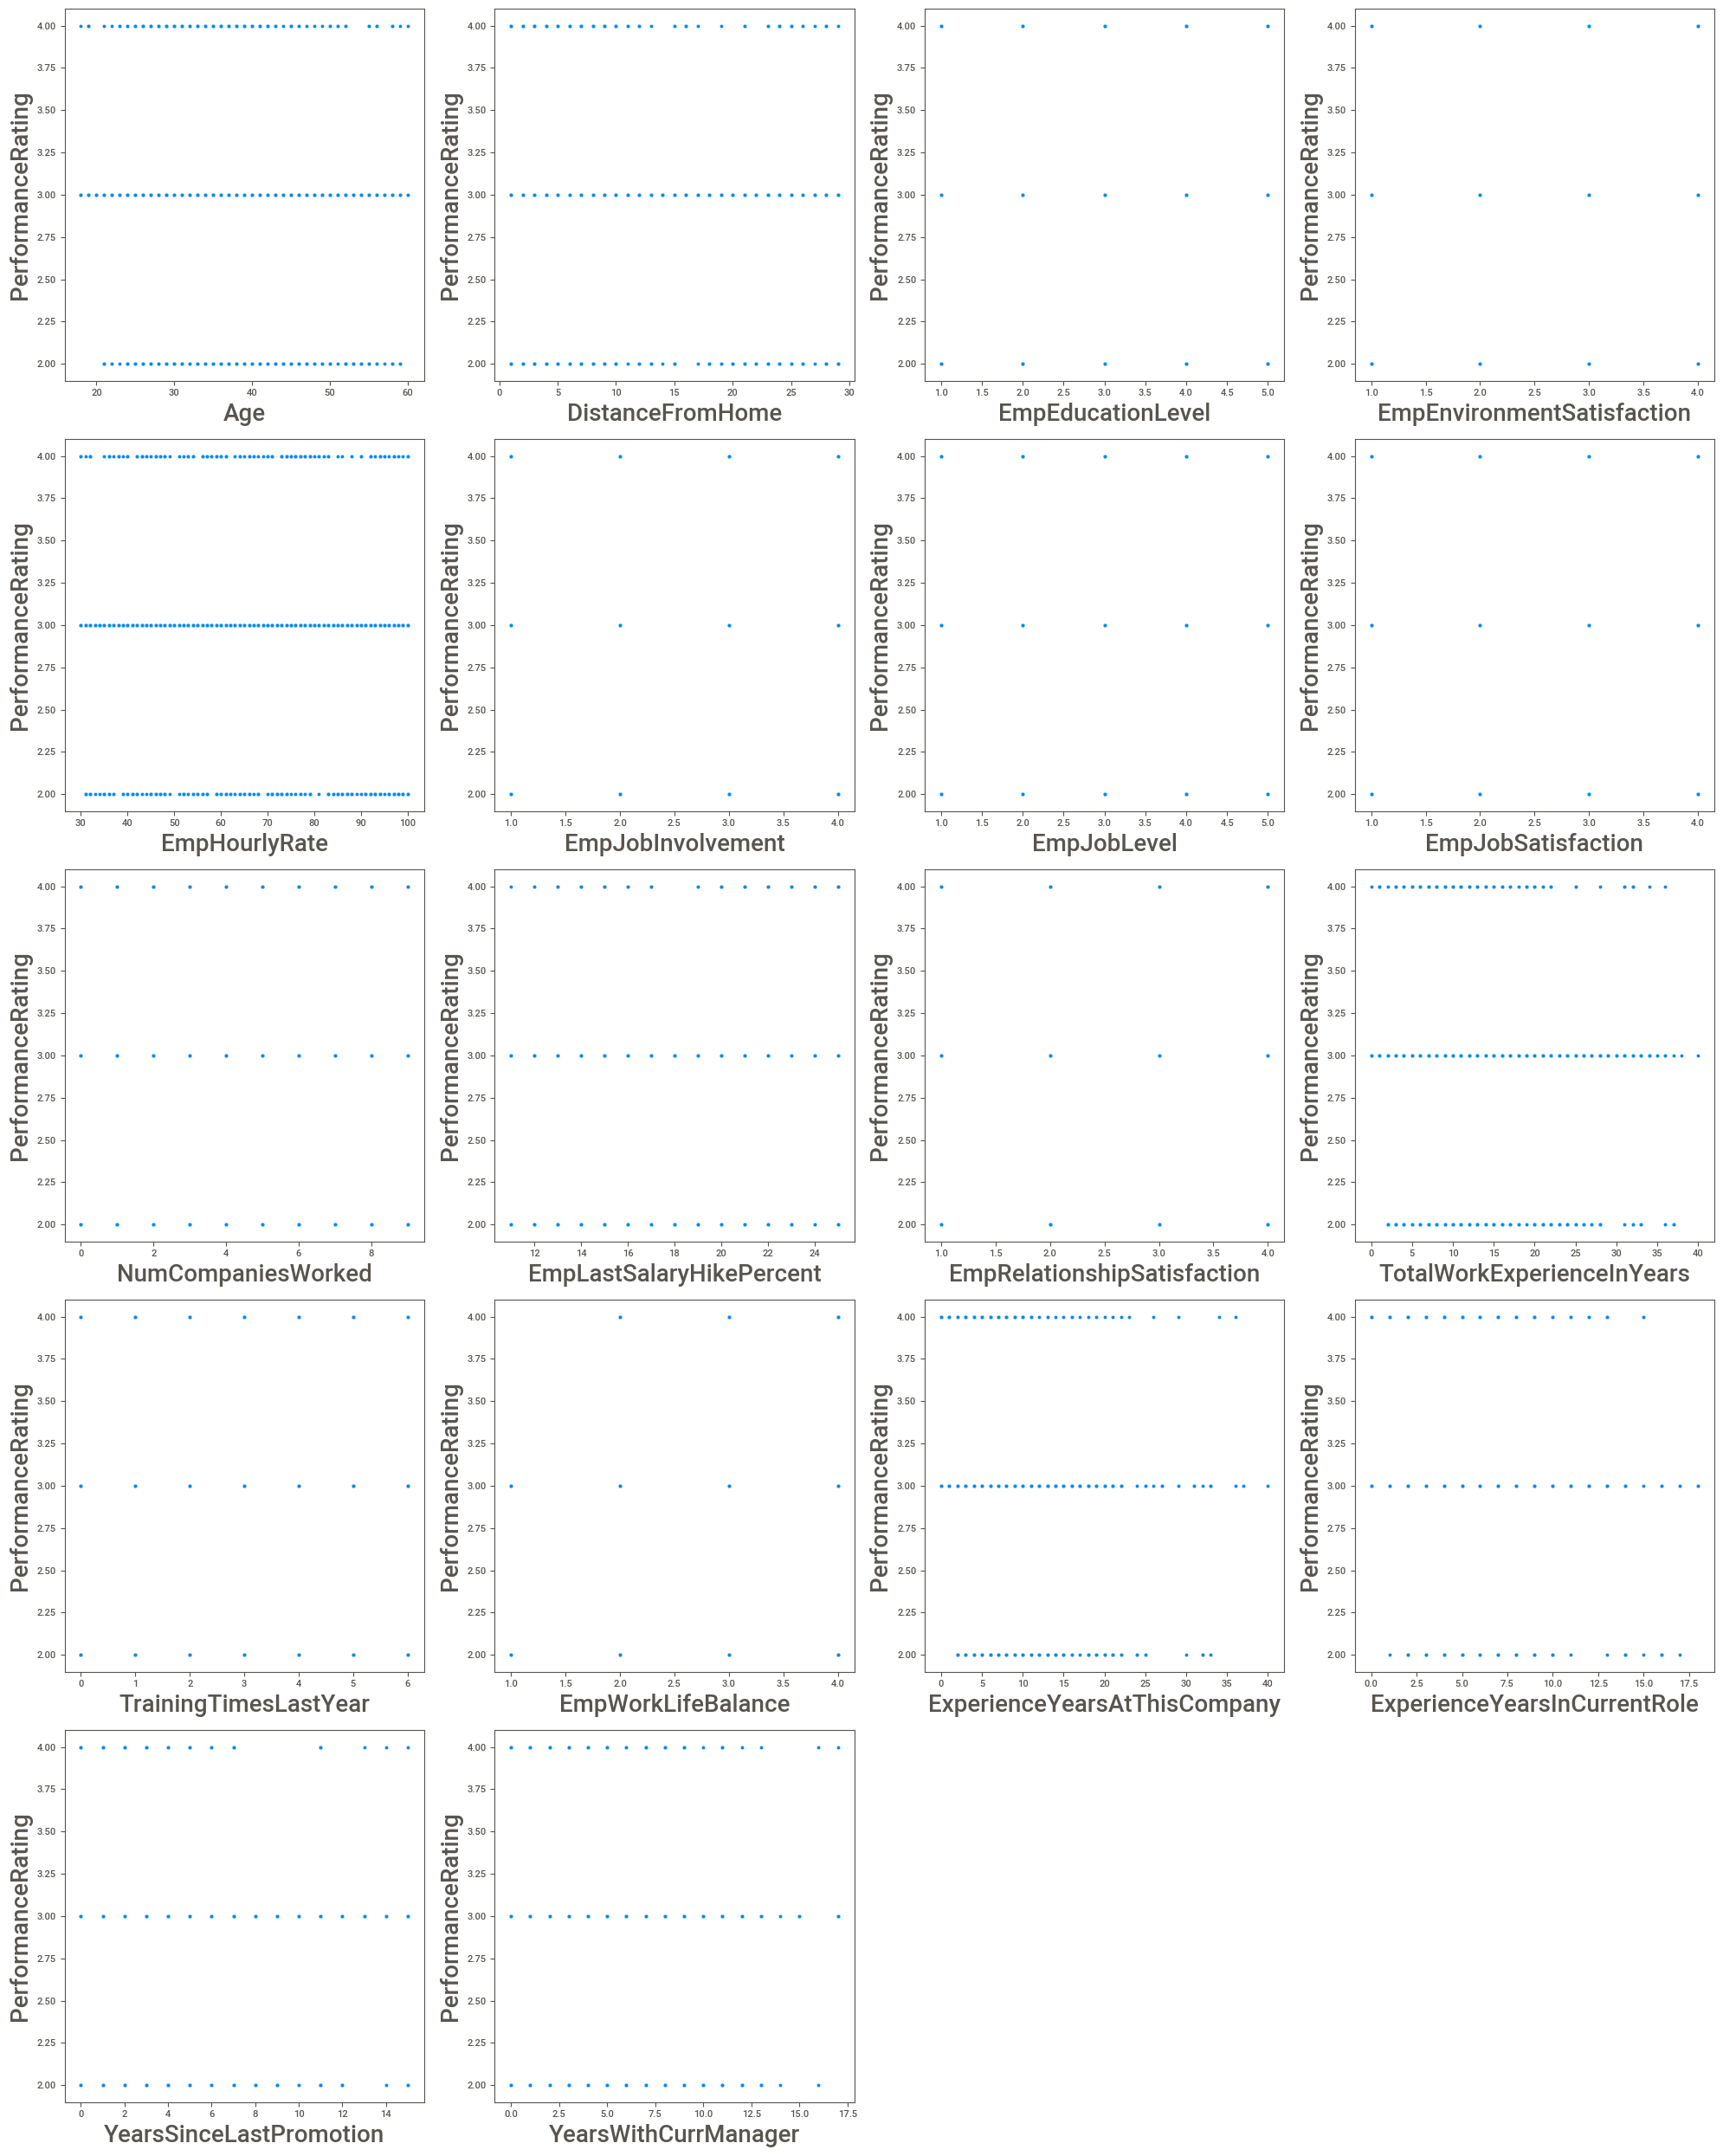

In [19]:

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for column in d2:
     if plotnumber<=20 :
        ax = plt.subplot(5,4,plotnumber)
        sns.scatterplot(x=d2[column].dropna(axis=0)
                        ,y=data.PerformanceRating)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PerformanceRating',fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [20]:
# Difficult to draw insights from hist plot and scatter plot so searching for other alternatives.

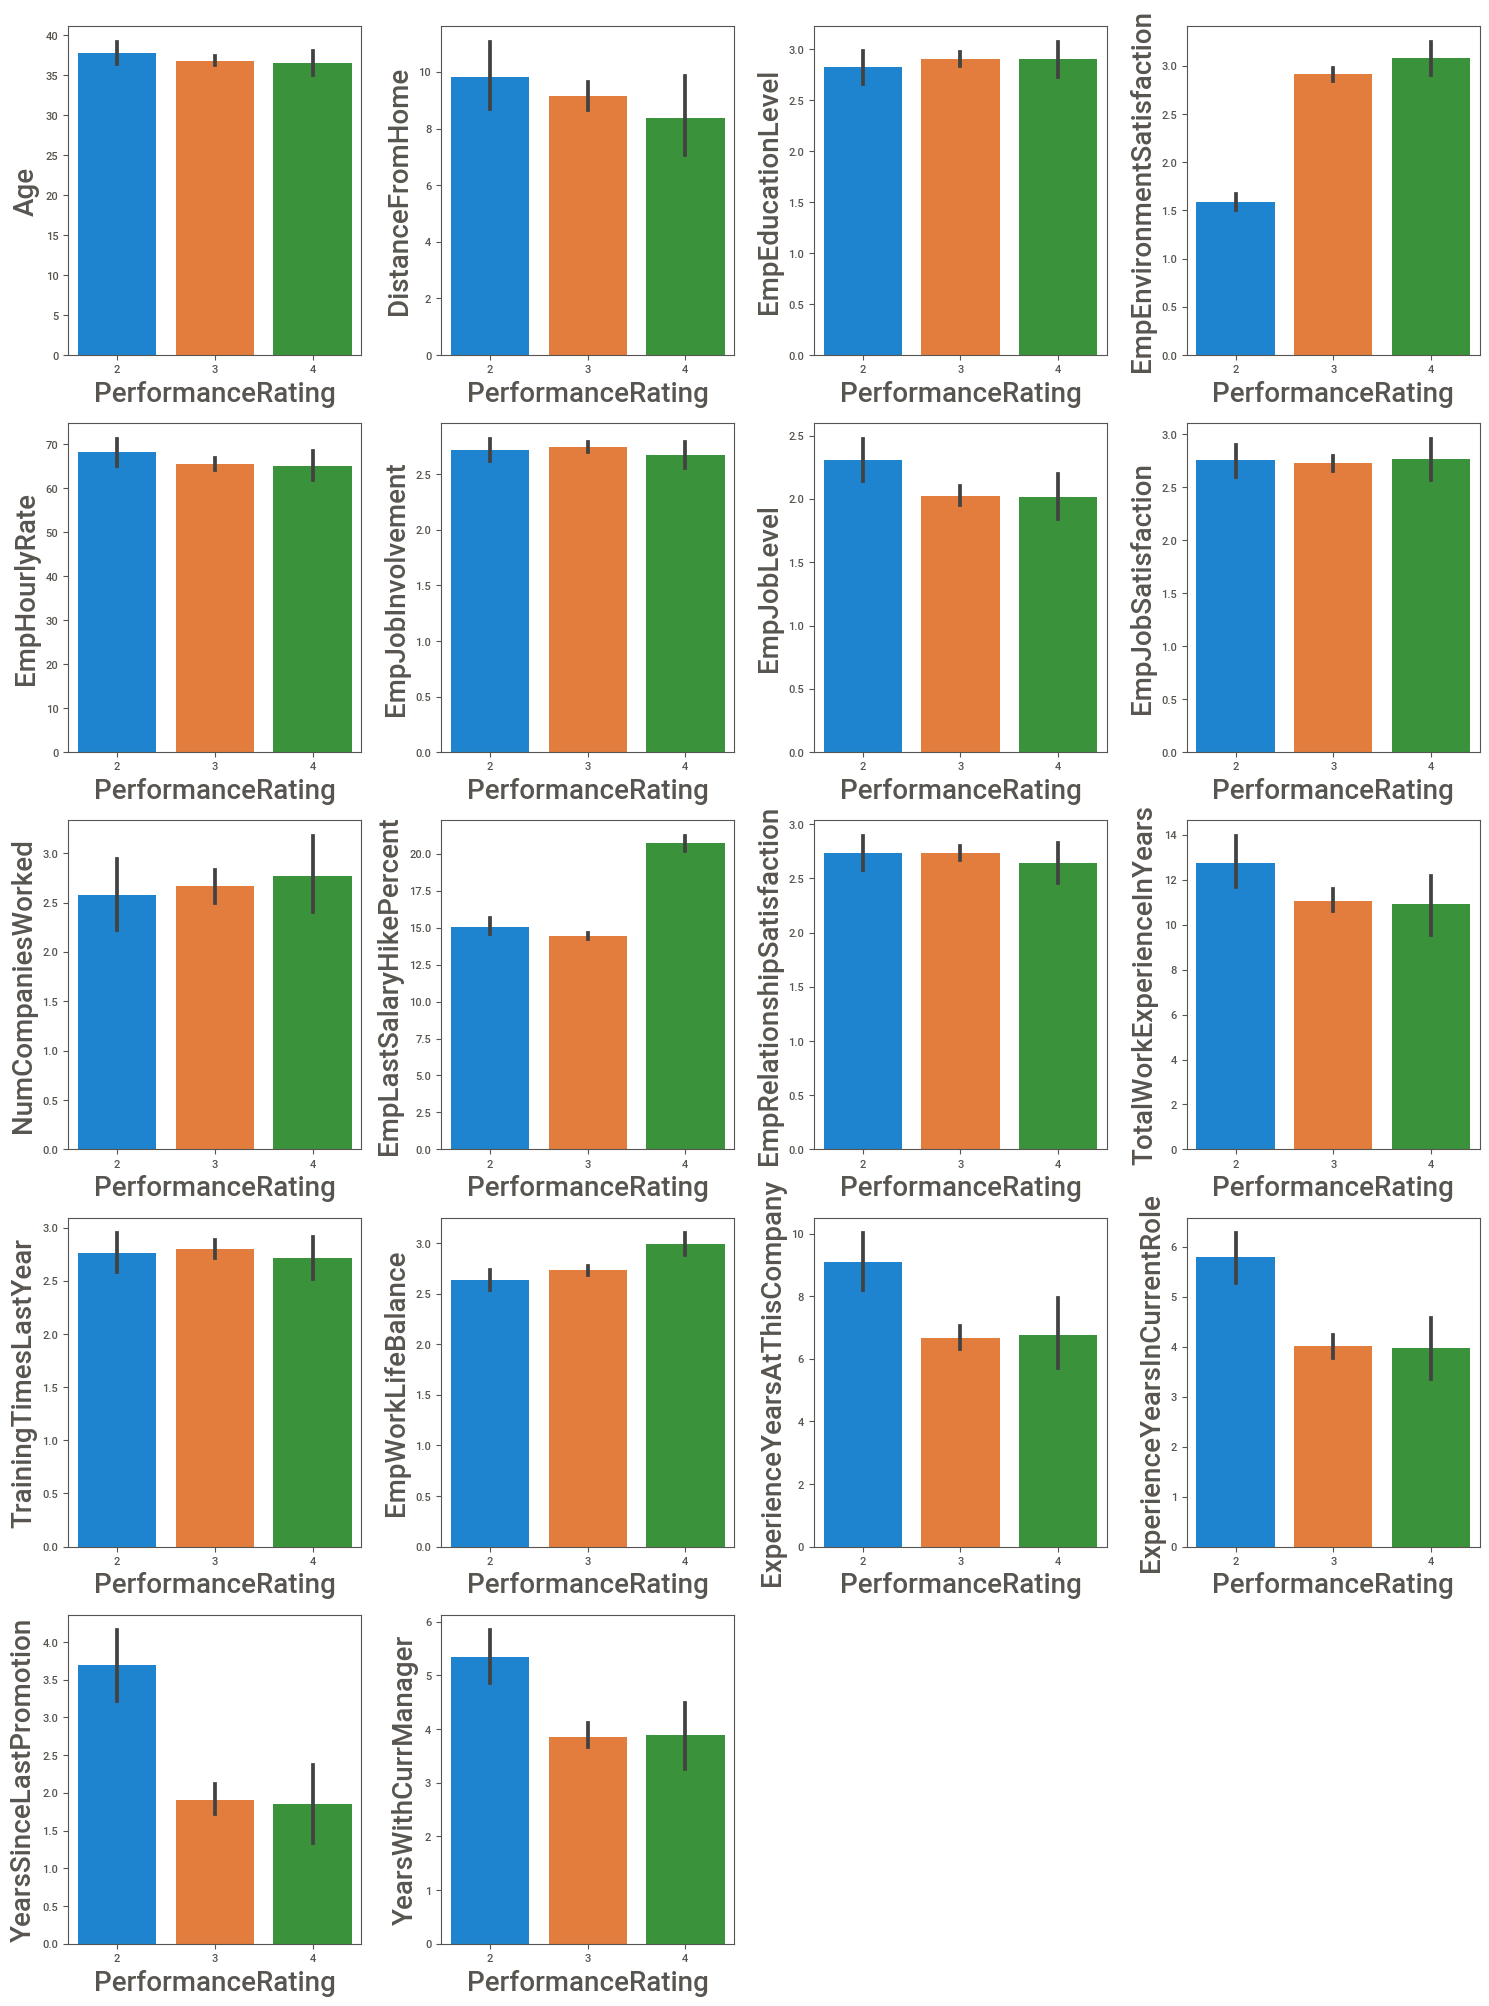

In [21]:
plt.figure(figsize=(15,20), facecolor='white')
plotnumber = 1

for column in d2:
    if plotnumber<=20 :
        ax = plt.subplot(5,4,plotnumber)
        sns.barplot(x=data.PerformanceRating,y=d2[column].dropna(axis=0))    
        plt.ylabel(column,fontsize=20)
        plt.xlabel('PerformanceRating',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [22]:
data1=data[['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition','PerformanceRating']]

## Visualization of both categorical and numerical features

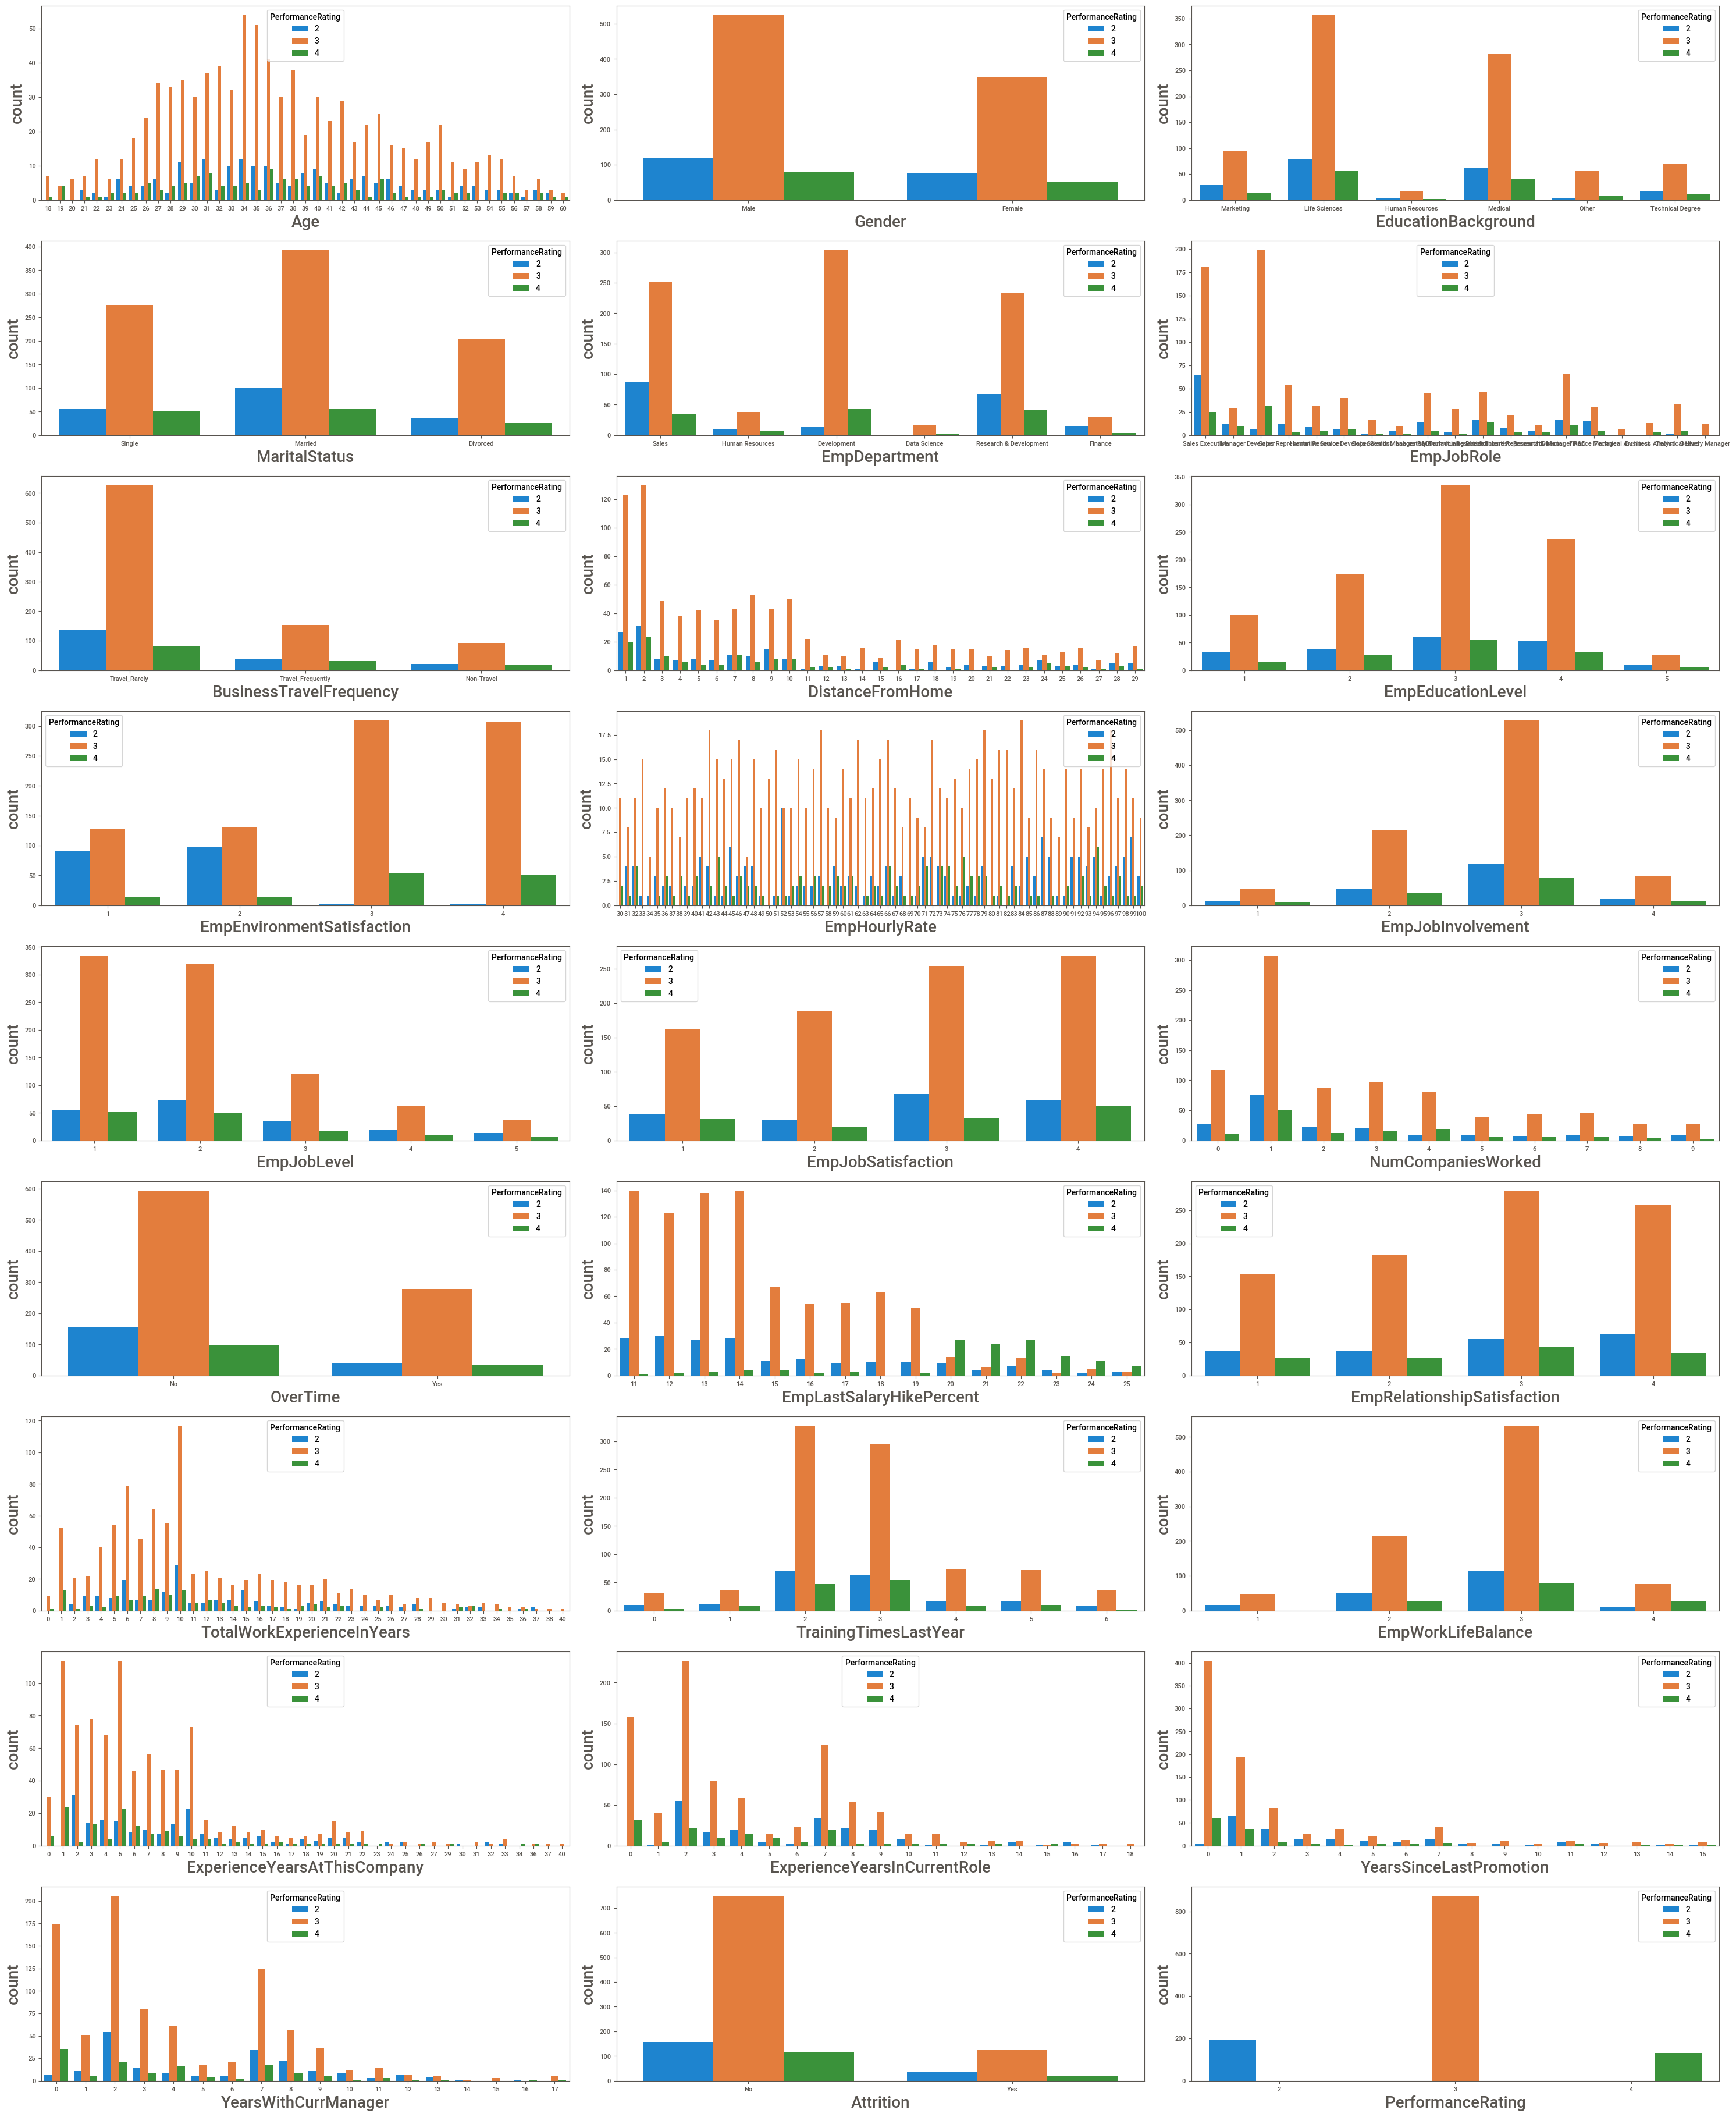

In [23]:
plt.figure(figsize=(30,40), facecolor='white') 
plotnumber = 1

for column in data1:
    if plotnumber<=30 :
        ax = plt.subplot(10,3,plotnumber)
        sns.countplot(x=data1[column].dropna(axis=0)
                        ,data=data1,hue='PerformanceRating')
        plt.xlabel(column,fontsize=20)
        plt.ylabel('count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

Text(0, 0.5, 'count')

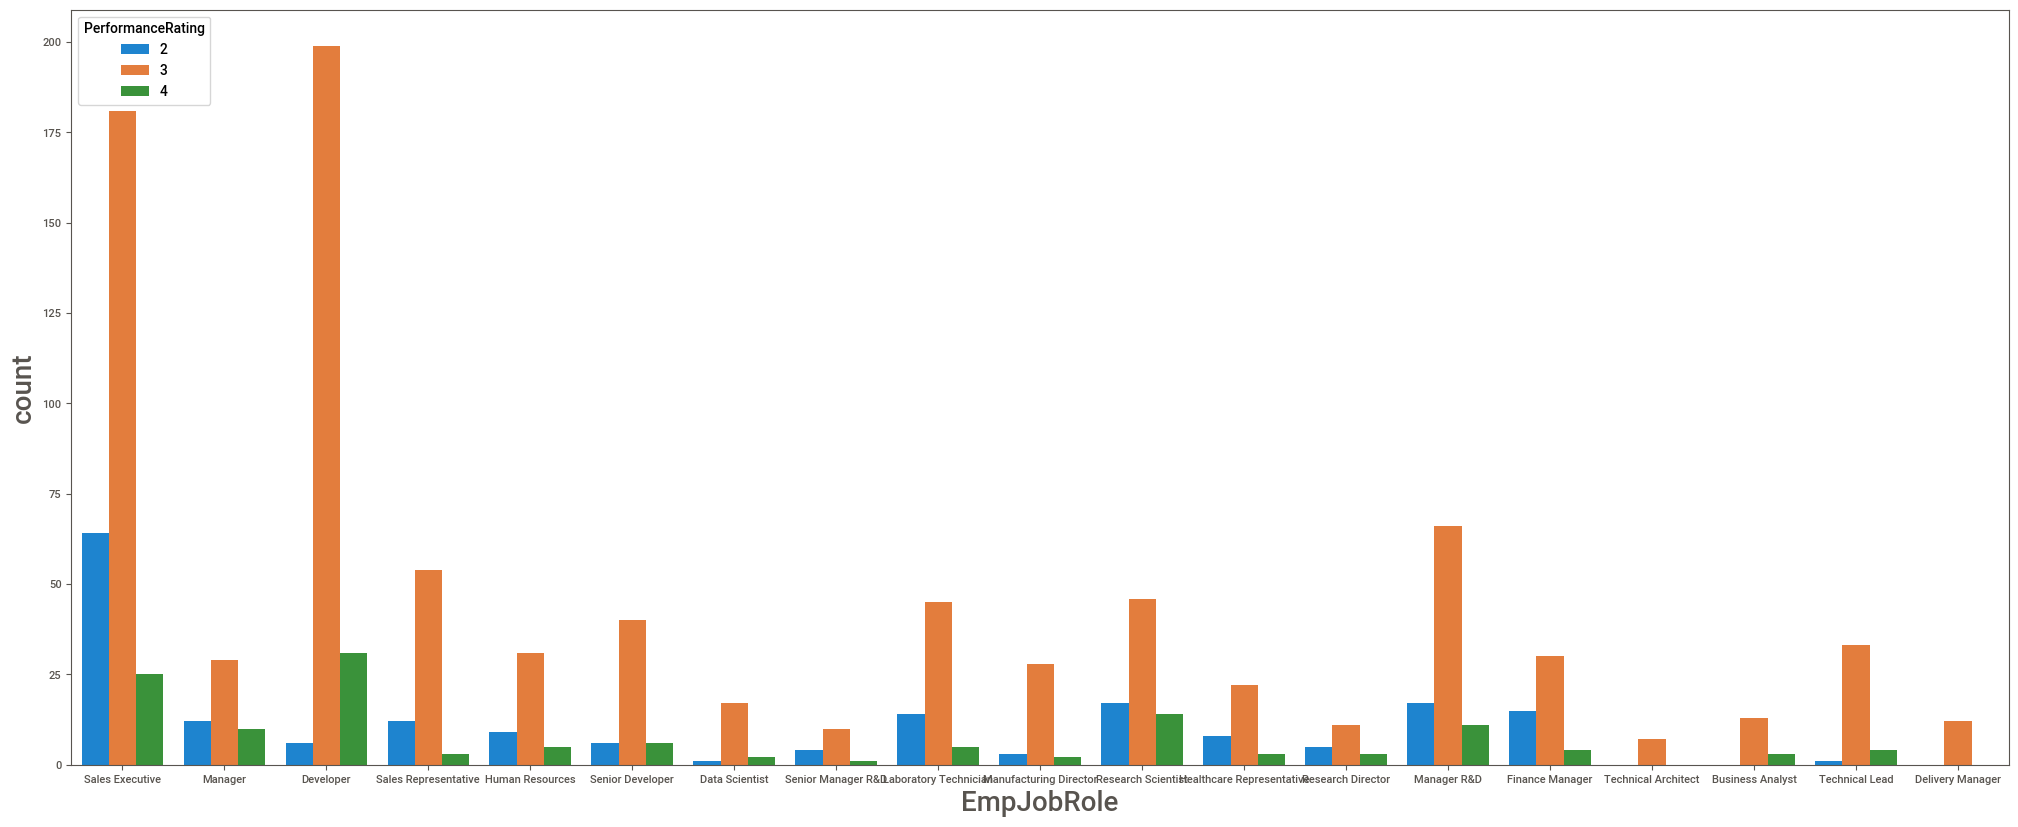

In [24]:
plt.figure(figsize=(25,10), facecolor='white')
sns.countplot(x=data1['EmpJobRole'].dropna(axis=0)
                        ,data=data1,hue='PerformanceRating')
plt.xlabel('EmpJobRole',fontsize=20)
plt.ylabel('count',fontsize=20)

In [25]:
#  For 'EmpJobRole' feature , visualization is diificult so drawn separately with larger scale.

## Insights

$ Age $
- The average performance rating from the age group 27-45 seems to be good as compare to other age group employees.
 
$ Gender $
- performance rating of male employees are quite higher than female employees that might be due to population gap between male and female employees ie 60-40.


$ EducationBackground$
- life sc. and medical background employees really perform better in this company than other education background employees.

$ MaritalStatus $
- The number of single status employees are quite lesser than married employees but their performance ratings is quite high means they are devoted to their work and perform better than married and divorced employees.

$ EmpDepartment$
- Out of all departments,development department outperform all other departments in their performance ratings.Average ratings of sales and research & development department are mixed as more employees get 2 as a score as compare to 3 or 4 score employees.

$ EmpJobRole$
- Out of all job role type delivery managers,technical architectures and developers perform really well.Where as sales executives,finance managers and research scientists performance ratings are mixed kinds.

$ BusinessTravelFrequency$
- Those who travel rarely,their average ratings is quite good as compare to those who travel frequently and non travel type.

$DistanceFromHome $
- Performance ratings have less or no relatinon ship with distance from home.But those who live more than 20 km from office their avg ratings is not good.

$ EmpEducationLevel $
- Categorised from the scale of 1-5.Those who have education level 3 (BACHELOR) or 4 (MASTERS) have higher performance rating.

$ EmpEnvironmentSatisfaction $
- Categorised from the scale of 1-4.Those who satisfied with their working environment(3 or 4) perform really better than who are not satisfied with their working environment.

$ EmpHourlyRate $
- There is no certain relation between ratings and hourly rate as in case of both high and low hourly rate still the ratigs is both mixed(good and bad)

$ EmpJobInvolvement $
- Categorised from the scale of 1-4.When the job involvement score is 3, the performance rating is quite high as compare to other job involvement scores.

$ EmpJobLevel $
- Categorised from the scale of 1-5.At entry level score (1:(Below Colleg) & 2:(college)) performance ratings are quite high but when the level increases due to more responsibility the performance rating also detoriate.

$ EmpJobSatisfaction $
- When satisfaction level high(4),the performance ratings also high as satisfied employee performs better.The ratings slightly decreases as the satisfaction level decreases.

$ NumCompaniesWorked $
- 50% employees are working for no or only 1 company previously.So their performance also mixed kind.

$ OverTime $
- Those who work over time,their performance rating slightly lower than the employees who are not work over time.

$ EmpLastSalaryHikePercent $
- Good salary hike is the only way a company can reward to a good employee.So from the data set it is concluded when hike % lies 10-20% the performance rating is good but when the hike % is more than 25 ,employee rating boost to 4 as compare to (3,2)rating employees. 

$ EmpRelationshipSatisfaction $
- Measured from the scale of 1-4.Those employees who lies in the scale of 3 and 4 rspectively shows they are quite satisfied with their co-employees their performance ratings are quite high as compare to dissatisfied employees.

$ TotalWorkExperienceInYears $
- Employees having work experience 4-10 years, their performance rating are high as count also high still some give mixed reviews,but total experience years when lies 0-1,performance rating lies in the range of 3-4 ie good only.

$ TrainingTimesLastYear $
- Those who trained two or three times performed better than more or less number of trainings. 

$ EmpWorkLifeBalance $
- The employees whose work life balance is poor fail to perform good so their performance ratings are lower.

$ ExperienceYearsAtThisCompany $
- Generally the number of employees working in this company is 0-10 years.After 10 years of working the number of employees drastically decreases.

$ ExperienceYearsInCurrentRole $
- More than 50% employees have less than 3 years of experience in their respective current roles.So in that time they perform better but when same roles continues longer their performance ratings affected by it.

$ YearsSinceLastPromotion $
- 70% employees are present who promoted 1-2 years back.Apart from that 30% employees promotion takes more than 2 years.For a employee whose promotion pending for a longer years (more than 4-5 years) ,their performance also decreases. 

$ YearsWithCurrManager $
- About 60% employees working with less than 3 years with the current managers.when this value more than 5 years the performance ratings gradually decreases for the employees.

$ Attrition $
- About 15% employees wants to leave organization for many reasons.85% employees are happy with their jobs in this company.
  Those employees whose performance ratings are good(3-4) but still wants to leave,the company must take some course of action     to keep those employees.



## Department wise performances.

Text(0, 0.5, 'count')

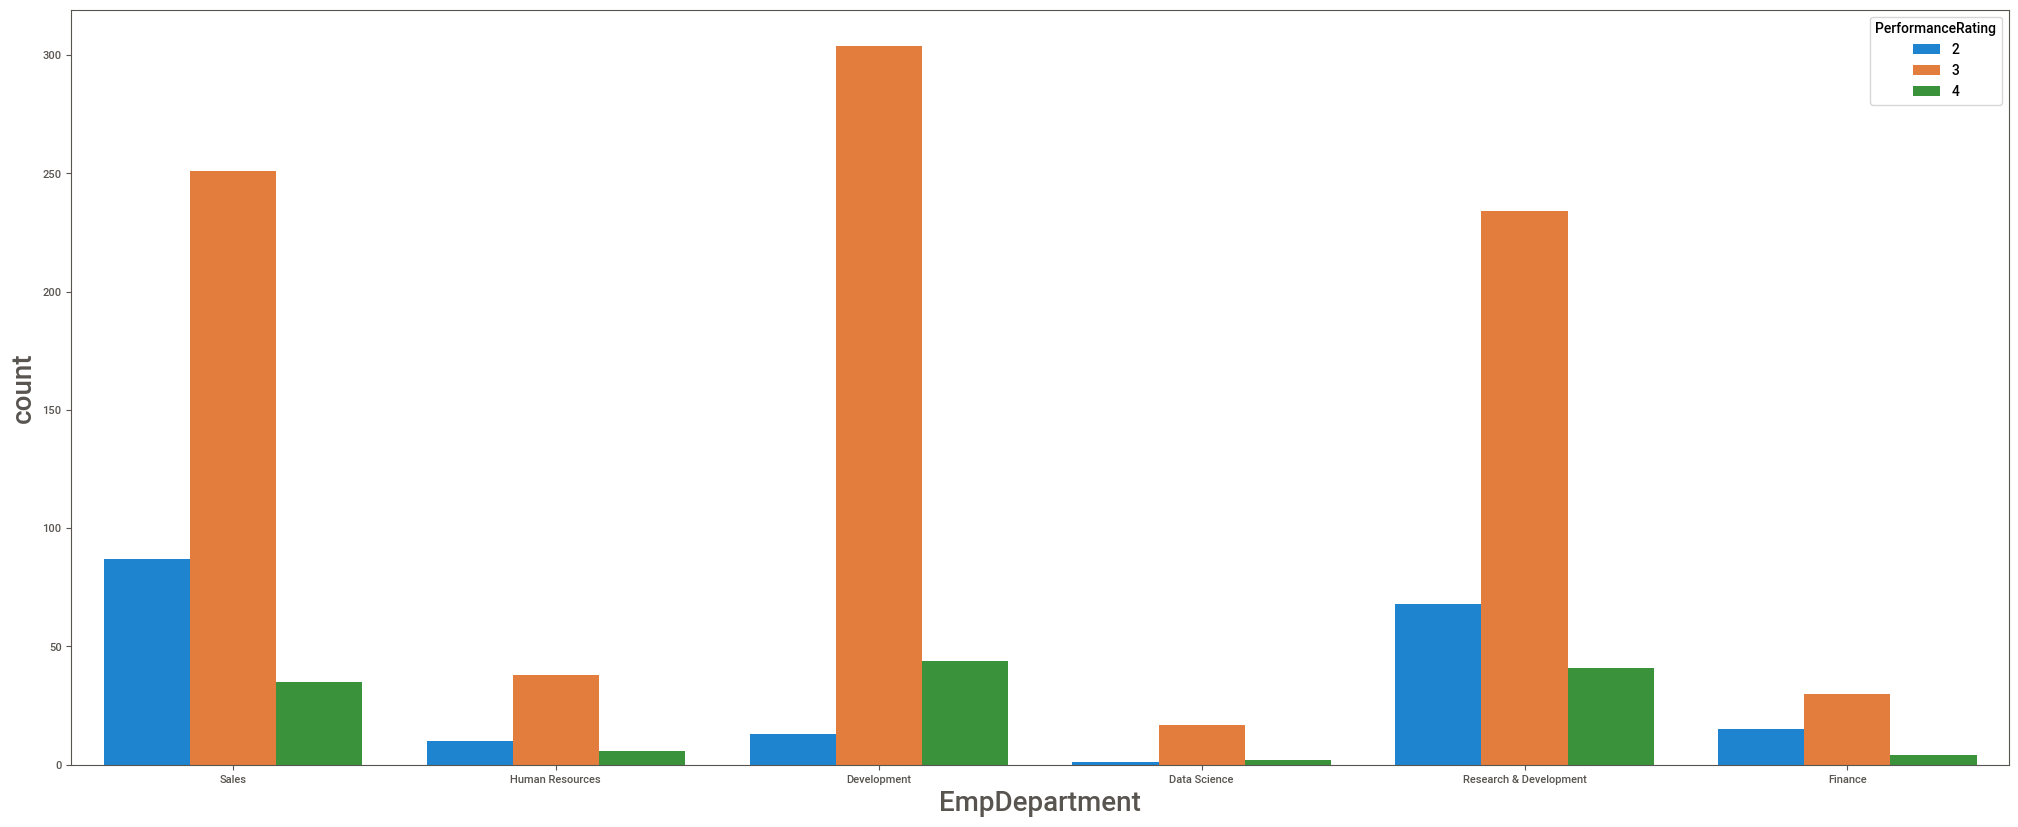

In [26]:
plt.figure(figsize=(25,10), facecolor='white')
sns.countplot(x=data1['EmpDepartment'].dropna(axis=0)
                        ,data=data1,hue='PerformanceRating')
plt.xlabel('EmpDepartment',fontsize=20)
plt.ylabel('count',fontsize=20)

<AxesSubplot:xlabel='PerformanceRating', ylabel='EmpDepartment'>

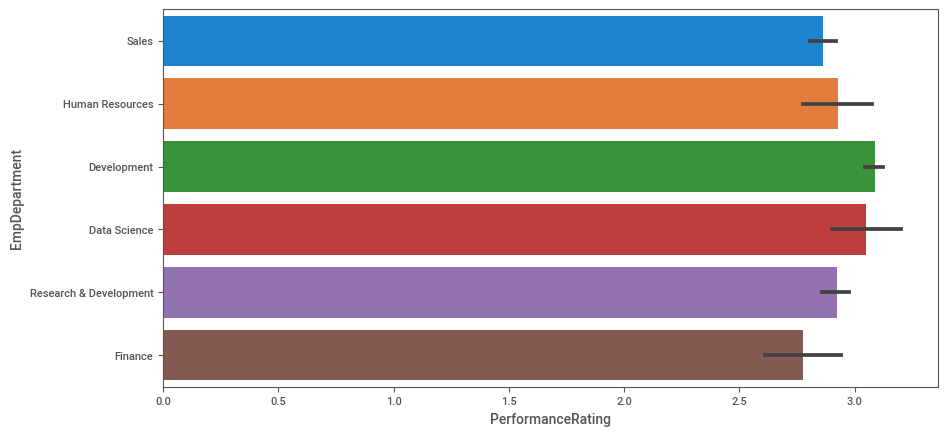

In [27]:
plt.figure(figsize=(10,5))
sns.barplot(data1['PerformanceRating'],data1['EmpDepartment'])

#### Insights from above two figures

$ SALES $
* Out of total 373 sales employees,approximately 250 gets performance rating of 3 ('Excellent'),40 gets performance rating of 4 ('Outstanding') and 80 gets performance rating of 2('Good').The average performance rating of sales department is approximately 2.8.

$ HUMAN-RESOURCES $
* Out of total 54  employees,approximately 40 gets performance rating of 3('Excellent'),5 gets performance rating of 4('Outstanding') and 9 gets performance rating of 2('Good').The average performance rating of this department is approximately 3 i.e excellent.

$ DEVELOPMENT $
* Out of total 361 employees,approximately 300 gets performance rating of 3('Excellent'),45-48 gets performance rating of 4('Outstanding') and 12-16 gets performance rating of 2('Good').The average performance rating of this department is approximately 3.2.

$ DATA SCIENCE $
* Out of total 20 employees,approximately 15 gets performance rating of 3('Excellent'),3 gets performance rating of 4('Outstanding') and 2 gets performance rating of 2('Good').The average performance rating of this department is approximately 3.1.

$ RESEARCH-AND-DEVELOPMENT $
* Out of total 343 sales employees,approximately 240 gets performance rating of 3('Excellent'),40-45 gets performance rating of 4('Outstanding') and 60-65 gets performance rating of 2('Good').The average performance rating of this department is approximately 2.9.

$ FINANCE $
* Out of total 49 employees,approximately 30 gets performance rating of 3('Excellent'),15 gets performance rating of 4('Outstanding') and 4 gets performance rating of 2('Good').The average performance rating of this department is approximately 2.75.

###### If we arrange the efficiency of departments based on average performance ratings we get
- DEVELOPMENT  > DATA SCIENCE > HUMAN RESOURCES > RESEARCH ANDDEVELOPMENT > SALES > FINANCE 

# Data Preprocessing

### Missing Value Treatment

In [28]:
# Checking for missing values 
data1.isnull().sum()

# As seen no missing values are present. So, imputation is not required

Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [29]:
data1.dtypes

Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Attrition                

### Outlier removal for Numerical Features

In [30]:
## new_df1 contains numerical features
# creating new data frame new_df1
new_df1 = data1[['Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel','EmpJobSatisfaction',
         'NumCompaniesWorked','EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','TotalWorkExperienceInYears',
         'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion','YearsWithCurrManager']]
new_df1

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0      32                10                  3                           4   
1      47                14                  4                           4   
2      40                 5                  4                           4   
3      41                10                  4                           2   
4      60                16                  4                           1   
...   ...               ...                ...                         ...   
1195   27                 3                  1                           4   
1196   37                10                  2                           4   
1197   50                28                  1                           4   
1198   34                 9                  3                           4   
1199   24                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked  EmpLastSalaryHikePercent  \
0                      1                        12   
1                      2                        12   
2                      5                        21   
3                      3                        15   
4                      8                        14   
...                  ...                       ...   
1195                   1                        20   
1196                   3                        17   
1197                   1                        11   
1198                   1                        14   
1199                   9                        14   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                               4                          10   
1                               4                          20   
2                               3                          20   
3                               2                          23   
4                               4                          10   
...                           ...                         ...   
1195                            2                           6   
1196                            1                           4   
1197                            3                          20   
1198                            2                           9   
1199                            1                           4   

      EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                            10   
1                      3                             7   
2                      3                            18   
3                      2                            21   
4                      3                             2   
...                  ...                           ...   
1195                   3                             6   
1196                   3                             1   
1197                   3                            20   
1198                   4                             8   
1199                   3                             2   

      ExperienceYearsInCurrentRole  Years

### Using distribution plots

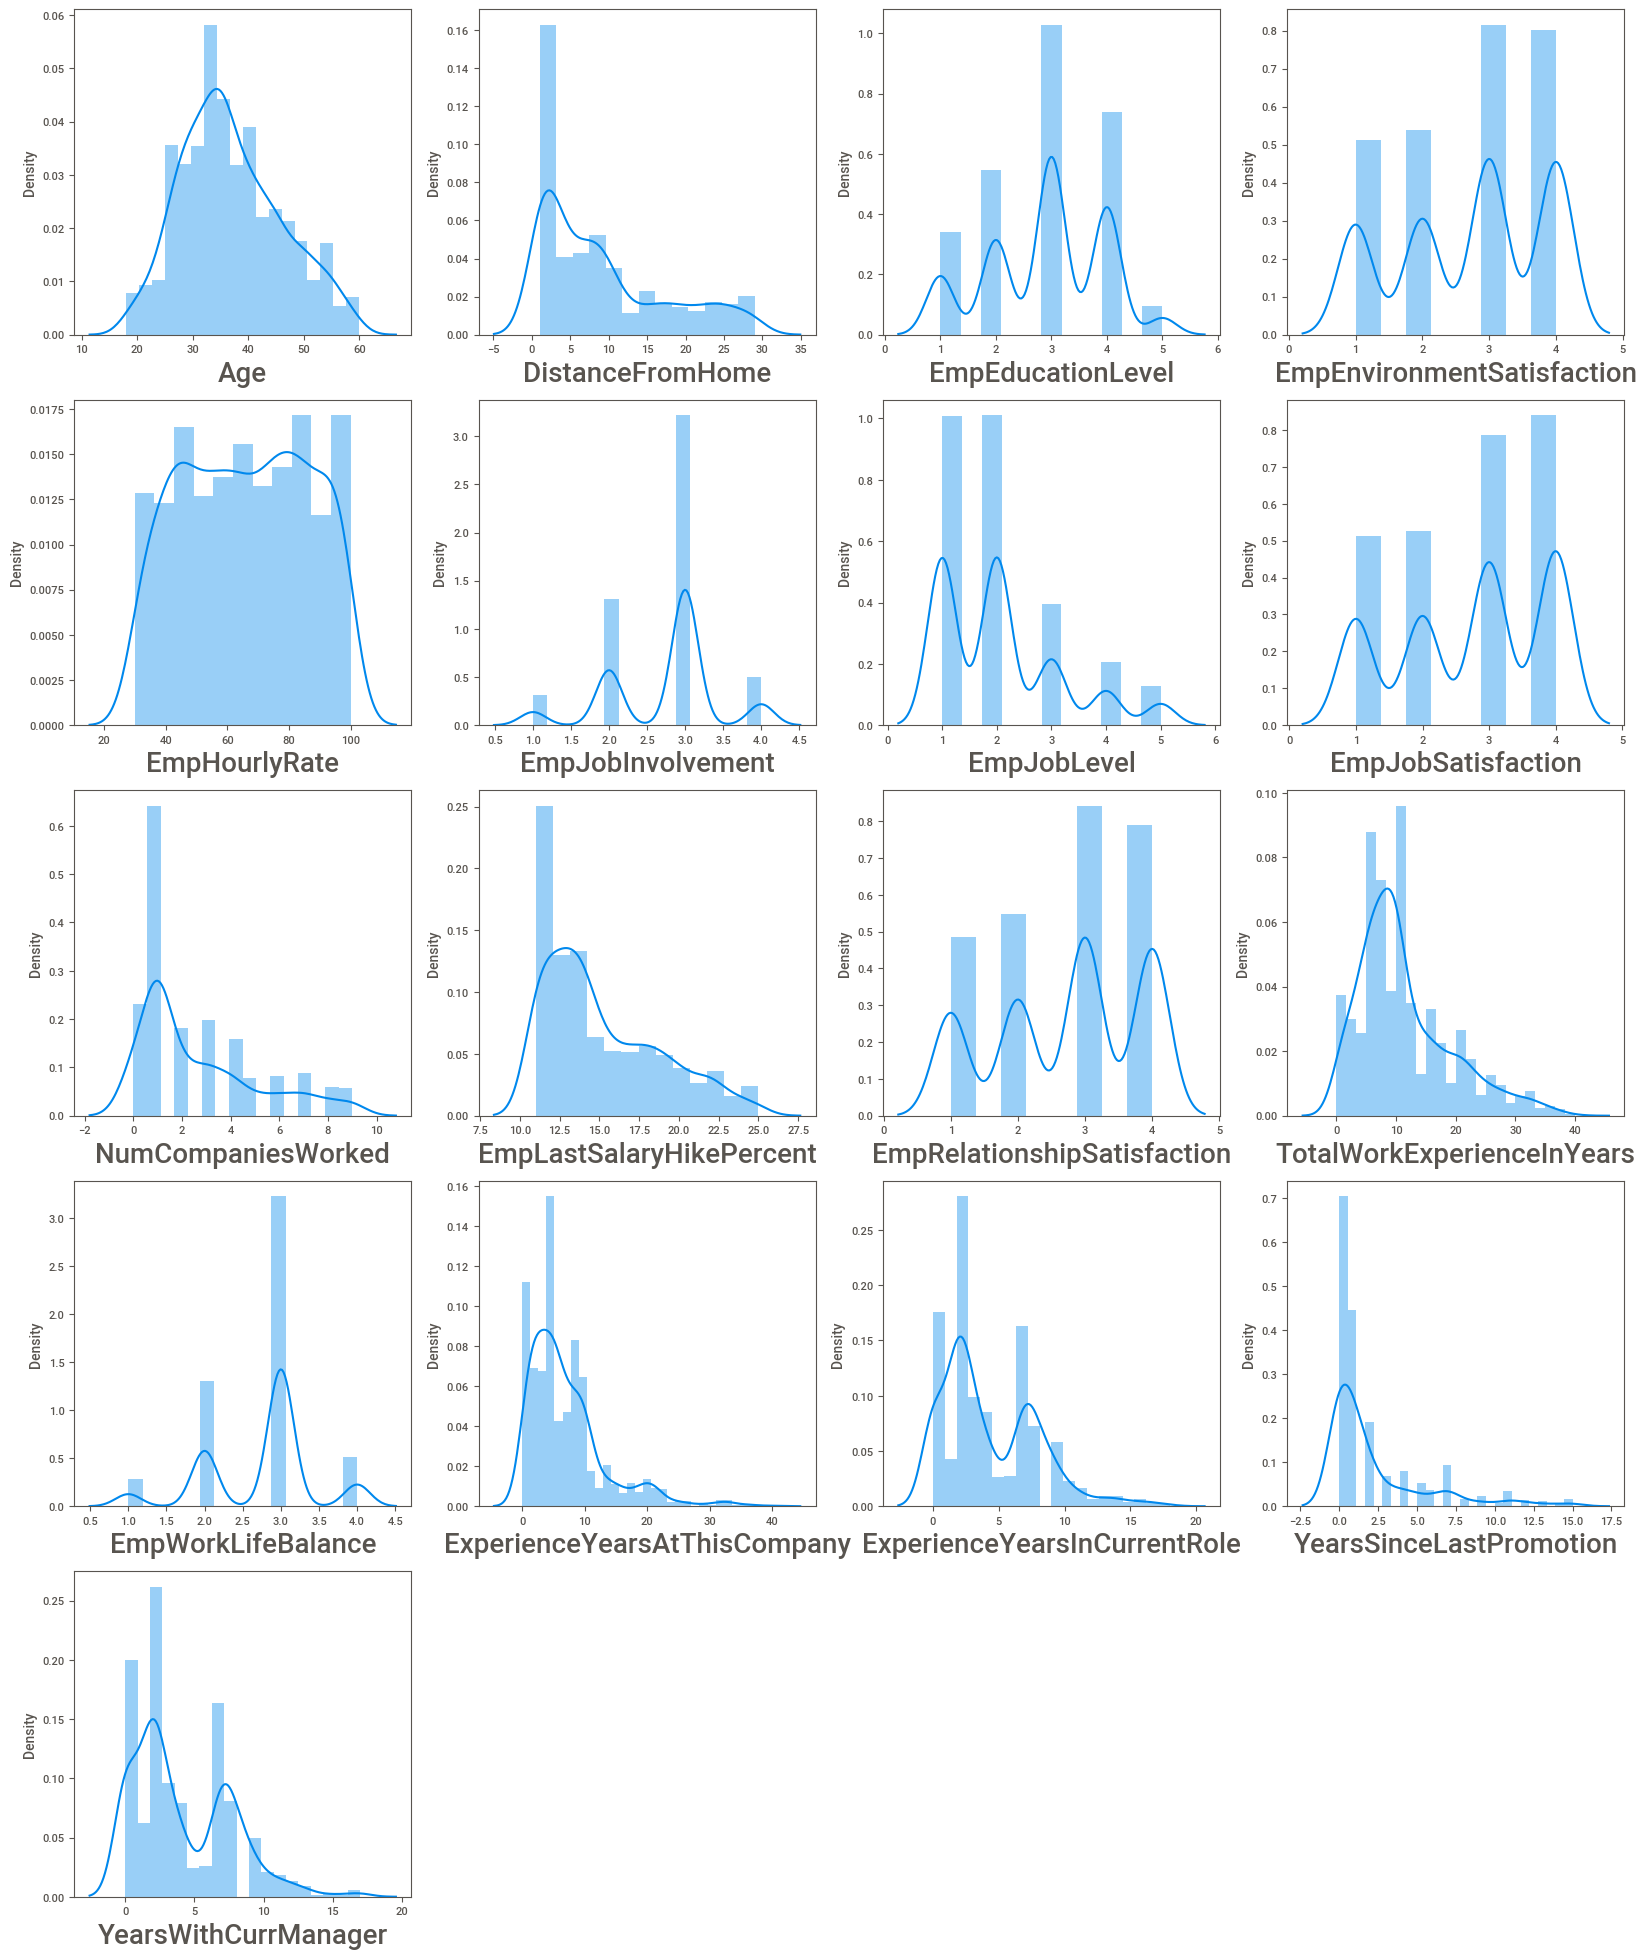

In [31]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df1:
    if plotnumber<=20 :
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(new_df1[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()

#Observation:
# outliers are present.Needs treatment for outliers

## Visualizing Outliers Using Boxplots

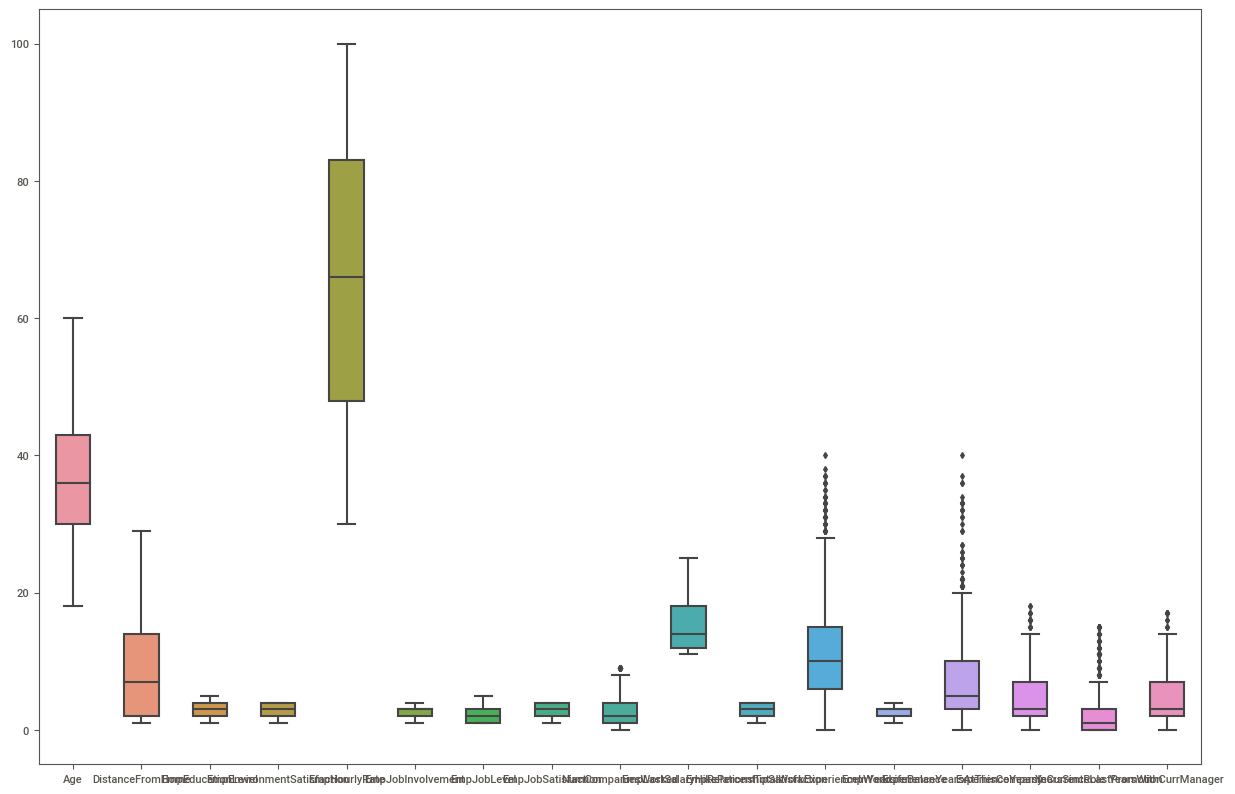

In [32]:
## checking the outliers for numeric features using boxplot
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=new_df1, width= 0.5,ax=ax,  fliersize=3)
plt.show()

#Observation: Needs outlier treatment # here visualization is difficult, so trying other way of plotting outliers.

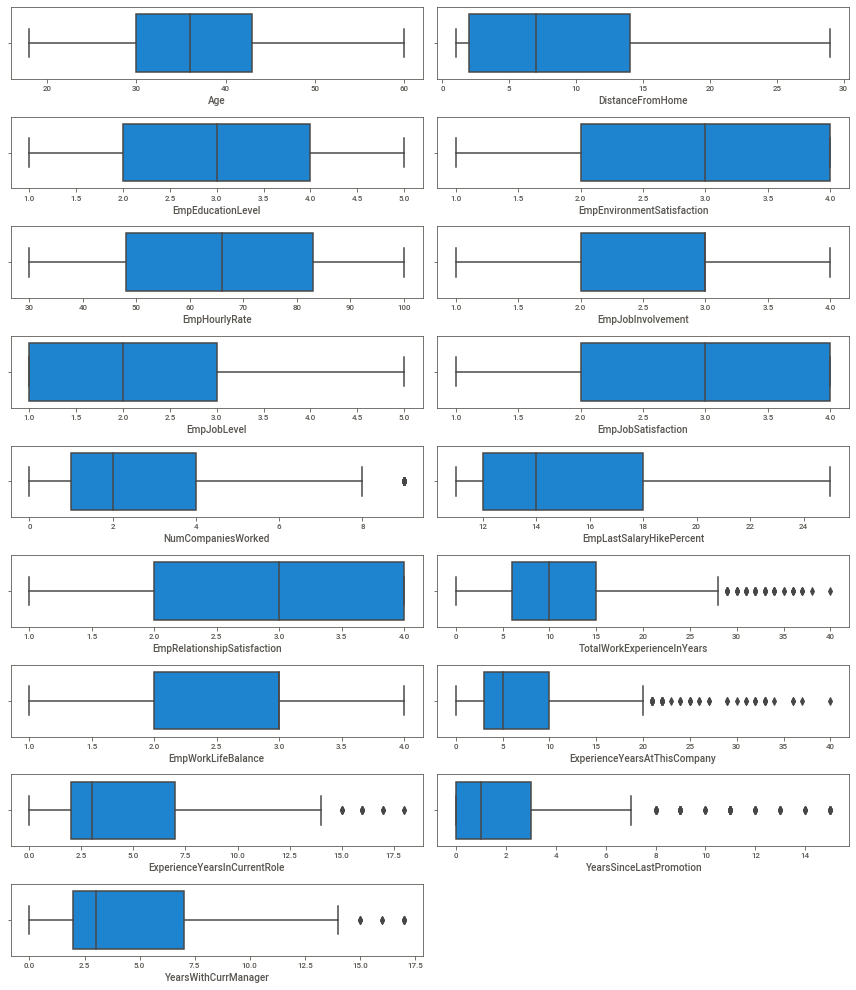

In [33]:
%matplotlib inline
plt.figure(figsize=(12,15), tight_layout=True)  
plotnumber=1
for column in new_df1:
    if plotnumber<=20:
        ax=plt.subplot(10,2,plotnumber) 
        #plt.xlabel(column,fontsize = 5)   
        sns.boxplot(x=new_df1[column])
        plotnumber+=1

In [34]:
#For some features like 'Age','DistanceFromHome','EmpEducationLevel','EmpEnvironmentSatisfaction','EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel','EmpJobSatisfaction',
#'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction','EmpWorkLifeBalance' outliers are not present which clearly seen from the box plots
#so for other features outliers treatments are required.

# Removing Outliers

In [35]:
# now separating features individually and removing outliers.

### Checking Outlier For The Feature "NumCompaniesWorked"

In [36]:
sns.distplot(data1.NumCompaniesWorked)
# Data is not normally distributed. So, outlier treatment is necessary

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='Density'>

<AxesSubplot:xlabel='NumCompaniesWorked'>

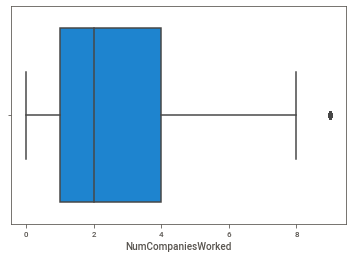

In [37]:
sns.boxplot(data1.NumCompaniesWorked)

#Outlier treatment required 

### Removing Outlier For "NumCompaniesWorked" Feature Using IQR

In [38]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['NumCompaniesWorked'], interpolation = 'midpoint') 

IQR

3.0

In [39]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['NumCompaniesWorked'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['NumCompaniesWorked'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [40]:
min_limit

-3.5

In [41]:
#filtering the data
data1.loc[data1['NumCompaniesWorked']<min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [42]:
max_limit

8.5

In [43]:
data1.loc[data1['NumCompaniesWorked']>max_limit]

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
8      36  Female       Life Sciences       Married             Development   
11     47  Female             Medical      Divorced                   Sales   
16     39  Female     Human Resources       Married         Human Resources   
38     54  Female             Medical      Divorced             Development   
56     42  Female       Life Sciences       Married             Development   
73     44    Male             Medical        Single             Development   
105    58    Male       Life Sciences      Divorced             Development   
149    50    Male             Medical      Divorced             Development   
184    32  Female             Medical        Single  Research & Development   
211    44    Male             Medical       Married         Human Resources   
231    39    Male       Life Sciences        Single  Research & Development   
251    40  Female             Medical        Single  Research & Development   
321    36  Female       Life Sciences        Single  Research & Development   
338    52    Male       Life Sciences        Single                   Sales   
343    40    Male       Life Sciences      Divorced  Research & Development   
409    31  Female             Medical        Single         Human Resources   
476    34    Male       Life Sciences       Married  Research & Development   
497    36  Female       Life Sciences       Married                 Finance   
553    29  Female             Medical       Married  Research & Development   
588    43    Male    Technical Degree       Married  Research & Development   
664    42    Male             Medical       Married  Research & Development   
740    29    Male             Medical       Married  Research & Development   
766    27    Male             Medical       Married             Development   
793    36  Female       Life Sciences       Married             Development   
804    48    Male       Life Sciences        Single             Development   
925    45    Male             Medical       Married             Development   
929    38    Male       Life Sciences       Married             Development   
939    40    Male       Life Sciences       Married             Development   
967    31    Male             Medical      Divorced             Development   
1003   38    Male       Life Sciences      Divorced             Development   
1006   49  Female       Life Sciences        Single             Development   
1042   45    Male               Other       Married             Development   
1069   29    Male       Life Sciences        Single             Development   
1070   35    Male       Life Sciences        Single             Development   
1082   30    Male    Technical Degree        Single             Development   
1130   34  Female     Human Resources      Divorced         Human Resources   
1137   35    Male           Marketing       Married                   Sales   
1143   31    Male       Life Sciences      Divorced                   Sales   
1199   24  Female       Life Sciences        Single                   Sales   

                  EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
8                  Developer              Non-Travel                 8   
11           Sales Executive       Travel_Frequently                 3   
16           Human Resources           Travel_Rarely                 3   
38                 Developer           Travel_Rarely                19   
56                 Developer           Travel_Rarely                 1   
73                 Developer           Travel_Rarely                 4   
105                Developer       Travel_Frequently                 2   
149         Senior Developer           Travel_Rarely                 1   
184       Senior Manager R&D              Non-Travel                29   
211          Human Resources           Travel_Rarely                 1   
231    Laboratory Technician   

In [44]:
## imputing the outliers as the count is high
data1.loc[data1['NumCompaniesWorked'] > max_limit,'NumCompaniesWorked']=np.median(data1['NumCompaniesWorked'])

<AxesSubplot:xlabel='NumCompaniesWorked'>

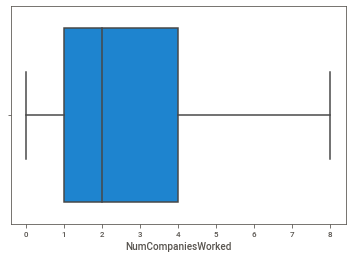

In [45]:
# Checking for outliers again using boxplot

sns.boxplot(data1.NumCompaniesWorked)
#Insight: Outlier has been removed for the "NumCompaniesWorked" feature

### Checking Outlier For The Feature "TotalWorkExperienceInYears"


<AxesSubplot:xlabel='TotalWorkExperienceInYears', ylabel='Density'>

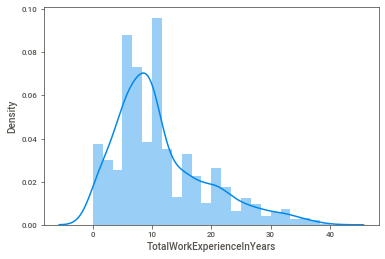

In [46]:
sns.distplot(data1.TotalWorkExperienceInYears)
# Data is not normally distributed. So, outlier treatment is necessary

<AxesSubplot:xlabel='TotalWorkExperienceInYears'>

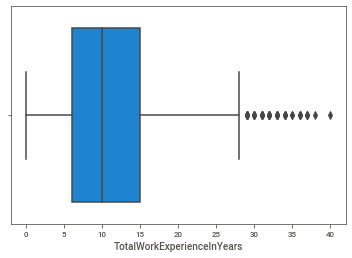

In [47]:
sns.boxplot(data1.TotalWorkExperienceInYears)

#Outlier treatment required 

### Removing Outlier For "TotalWorkExperienceInYears" Feature Using IQR

In [48]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['TotalWorkExperienceInYears'], interpolation = 'midpoint') 

IQR

9.0

In [49]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['TotalWorkExperienceInYears'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['TotalWorkExperienceInYears'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [50]:
min_limit

-7.5

In [51]:
#filtering the data
data1.loc[data1['TotalWorkExperienceInYears']<min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [52]:
max_limit

28.5

In [53]:
data1.loc[data1['TotalWorkExperienceInYears']>max_limit]

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
17     56    Male             Medical       Married             Development   
25     52    Male           Marketing       Married                   Sales   
48     50    Male             Medical       Married             Development   
72     51  Female           Marketing       Married                   Sales   
77     53  Female           Marketing       Married                   Sales   
96     53  Female       Life Sciences        Single             Development   
100    50    Male       Life Sciences      Divorced             Development   
149    50    Male             Medical      Divorced             Development   
173    59  Female       Life Sciences        Single  Research & Development   
178    52  Female           Marketing       Married                   Sales   
192    50    Male             Medical       Married  Research & Development   
199    55    Male             Medical        Single  Research & Development   
277    50  Female             Medical       Married  Research & Development   
292    54  Female       Life Sciences      Divorced  Research & Development   
295    54    Male       Life Sciences       Married  Research & Development   
308    55    Male             Medical      Divorced  Research & Development   
312    51    Male       Life Sciences      Divorced                   Sales   
342    56    Male       Life Sciences        Single         Human Resources   
347    51    Male       Life Sciences      Divorced         Human Resources   
351    58  Female             Medical       Married  Research & Development   
356    51  Female    Technical Degree        Single  Research & Development   
361    56    Male       Life Sciences       Married  Research & Development   
387    54  Female             Medical        Single  Research & Development   
388    58  Female             Medical       Married  Research & Development   
424    49    Male       Life Sciences      Divorced  Research & Development   
450    50    Male             Medical        Single  Research & Development   
471    53  Female    Technical Degree       Married  Research & Development   
475    55    Male           Marketing       Married                   Sales   
490    50    Male             Medical       Married                 Finance   
525    49  Female       Life Sciences       Married                 Finance   
528    54  Female             Medical       Married                 Finance   
589    55    Male             Medical       Married  Research & Development   
615    58    Male             Medical      Divorced                   Sales   
642    48    Male       Life Sciences       Married  Research & Development   
678    58  Female       Life Sciences       Married                   Sales   
703    55    Male     Human Resources       Married         Human Resources   
777    53  Female       Life Sciences       Married                   Sales   
816    50  Female             Medical      Divorced             Development   
845    58    Male             Medical        Single                   Sales   
867    58  Female             Medical       Married             Development   
921    52    Male       Life Sciences       Married             Development   
958    50  Female             Medical      Divorced                   Sales   
962    52    Male       Life Sciences        Single                   Sales   
989    55    Male             Medical        Single             Development   
1077   55  Female       Life Sciences        Single             Development   
1101   52  Female       Life Sciences       Married            Data Science   
1104   60  Female       Life Sciences       Married             Development   
1116   57    Male           Marketing      Divorced                   Sales   
1135   55  Female       Life Sciences        Single                   Sales   
1156   49    Male       Life Sciences      Divorced     

In [54]:
## imputing the outliers as the count is high
data1.loc[data1['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=np.median(data1['TotalWorkExperienceInYears'])


<AxesSubplot:xlabel='TotalWorkExperienceInYears'>

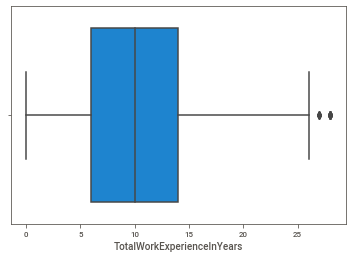

In [55]:
# Checking for outliers again using boxplot
sns.boxplot(data1.TotalWorkExperienceInYears)
#Insight: Outlier are still there so applying iqr for the "TotalWorkExperienceInYears" feature again

In [56]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['TotalWorkExperienceInYears'], interpolation = 'midpoint') 

IQR

8.0

In [57]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['TotalWorkExperienceInYears'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['TotalWorkExperienceInYears'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [58]:
min_limit

-6.0

In [59]:
max_limit

26.0

In [60]:
data1.loc[data1['TotalWorkExperienceInYears']>max_limit]

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
11     47  Female             Medical      Divorced                   Sales   
94     53    Male           Marketing       Married                   Sales   
166    48    Male       Life Sciences        Single  Research & Development   
221    48    Male             Medical        Single  Research & Development   
264    56  Female    Technical Degree      Divorced  Research & Development   
272    46  Female           Marketing       Married                   Sales   
483    50    Male           Marketing       Married                   Sales   
505    47  Female       Life Sciences       Married         Human Resources   
520    49  Female               Other       Married                 Finance   
593    53  Female             Medical       Married  Research & Development   
617    47  Female       Life Sciences      Divorced  Research & Development   
681    49    Male       Life Sciences       Married  Research & Development   
817    59  Female       Life Sciences        Single                   Sales   
851    50  Female       Life Sciences       Married             Development   
983    46  Female    Technical Degree       Married                   Sales   
997    50    Male       Life Sciences      Divorced             Development   
1099   52    Male             Medical       Married             Development   
1117   50    Male       Life Sciences       Married             Development   
1151   46  Female             Medical       Married             Development   

                  EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
11           Sales Executive       Travel_Frequently                 3   
94           Sales Executive           Travel_Rarely                 8   
166       Senior Manager R&D           Travel_Rarely                 4   
221              Manager R&D              Non-Travel                 1   
264                  Manager           Travel_Rarely                 4   
272                  Manager           Travel_Rarely                 2   
483                  Manager           Travel_Rarely                 9   
505                  Manager           Travel_Rarely                26   
520          Finance Manager           Travel_Rarely                22   
593   Manufacturing Director              Non-Travel                 1   
617              Manager R&D           Travel_Rarely                 4   
681              Manager R&D       Travel_Frequently                 2   
817          Sales Executive           Travel_Rarely                25   
851         Business Analyst       Travel_Frequently                 1   
983                  Manager           Travel_Rarely                 2   
997                Developer           Travel_Rarely                 4   
1099               Developer           Travel_Rarely                 3   
1117        Senior Developer           Travel_Rarely                29   
1151        Senior Developer       Travel_Frequently                18   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
11                    3                           4             49   
94                    3                           1             73   
166                   4                           3             78   
221                   4                           1             35   
264                   4                           4             92   
272                   3                           3             69   
483                   3                           3             59   
505                   4                           4             98   
520                   4                           1             72   
593                   4                           1             60   
617                   3                           3             92   
681                   1                           2             42   
817                   3           

In [61]:
## imputing the outliers as the count is high
data1.loc[data1['TotalWorkExperienceInYears'] > max_limit,'TotalWorkExperienceInYears']=np.median(data1['TotalWorkExperienceInYears'])


In [62]:
data1.loc[data1['TotalWorkExperienceInYears']>max_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [63]:
# so outliers removed

### Checking Outlier For The Feature "ExperienceYearsAtThisCompany"

<AxesSubplot:xlabel='ExperienceYearsAtThisCompany', ylabel='Density'>

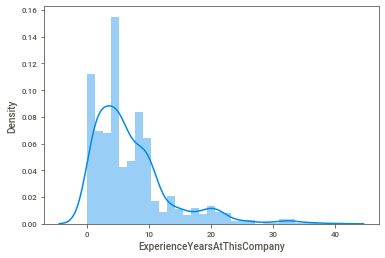

In [64]:
sns.distplot(data1.ExperienceYearsAtThisCompany)
# Data is not normally distributed. So, outlier treatment is necessary

<AxesSubplot:xlabel='ExperienceYearsAtThisCompany'>

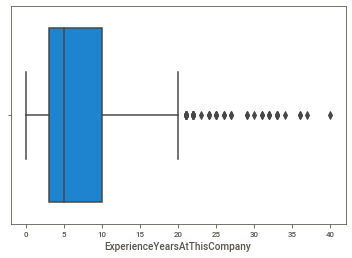

In [65]:
sns.boxplot(data1.ExperienceYearsAtThisCompany)

#Outlier treatment required 

### Removing Outlier For "ExperienceYearsAtThisCompany" Feature Using IQR

In [66]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['ExperienceYearsAtThisCompany'], interpolation = 'midpoint') 

IQR


7.0

In [67]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['ExperienceYearsAtThisCompany'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['ExperienceYearsAtThisCompany'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [68]:
min_limit

-7.5

In [69]:
#filtering the data
data1.loc[data1['ExperienceYearsAtThisCompany']<min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [70]:
max_limit

20.5

In [71]:
data1.loc[data1['ExperienceYearsAtThisCompany']>max_limit]

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
3      41    Male     Human Resources      Divorced         Human Resources   
11     47  Female             Medical      Divorced                   Sales   
25     52    Male           Marketing       Married                   Sales   
52     47  Female               Other       Married             Development   
100    50    Male       Life Sciences      Divorced             Development   
168    39  Female       Life Sciences       Married  Research & Development   
175    41  Female       Life Sciences      Divorced  Research & Development   
178    52  Female           Marketing       Married                   Sales   
181    39  Female             Medical        Single  Research & Development   
216    42    Male             Medical       Married  Research & Development   
252    42    Male       Life Sciences        Single                   Sales   
272    46  Female           Marketing       Married                   Sales   
304    44    Male           Marketing       Married                   Sales   
307    45  Female           Marketing        Single                   Sales   
308    55    Male             Medical      Divorced  Research & Development   
312    51    Male       Life Sciences      Divorced                   Sales   
316    44    Male       Life Sciences      Divorced  Research & Development   
320    43  Female           Marketing        Single                   Sales   
347    51    Male       Life Sciences      Divorced         Human Resources   
450    50    Male             Medical        Single  Research & Development   
459    40    Male             Medical        Single         Human Resources   
471    53  Female    Technical Degree       Married  Research & Development   
475    55    Male           Marketing       Married                   Sales   
490    50    Male             Medical       Married                 Finance   
492    44  Female             Medical      Divorced                 Finance   
555    45    Male       Life Sciences       Married  Research & Development   
557    45  Female    Technical Degree        Single  Research & Development   
571    40    Male             Medical        Single                   Sales   
613    41  Female           Marketing      Divorced                   Sales   
617    47  Female       Life Sciences      Divorced  Research & Development   
642    48    Male       Life Sciences       Married  Research & Development   
658    48  Female             Medical      Divorced  Research & Development   
777    53  Female       Life Sciences       Married                   Sales   
785    44  Female             Medical       Married             Development   
816    50  Female             Medical      Divorced             Development   
817    59  Female       Life Sciences        Single                   Sales   
838    40    Male       Life Sciences       Married             Development   
845    58    Male             Medical        Single                   Sales   
862    43    Male       Life Sciences       Married                   Sales   
867    58  Female             Medical       Married             Development   
911    46  Female           Marketing      Divorced                   Sales   
921    52    Male       Life Sciences       Married             Development   
956    42    Male    Technical Degree       Married             Development   
962    52    Male       Life Sciences        Single                   Sales   
978    40    Male             Medical      Divorced            Data Science   
989    55    Male             Medical        Single             Development   
1015   41    Male       Life Sciences        Single                   Sales   
1024   45    Male       Life Sciences      Divorced             Development   
1027   39    Male             Medical       Married             Development   
1036   39    Male             Medical       Married     

In [72]:
## imputing the outliers as the count is high
data1.loc[data1['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=np.median(data1['ExperienceYearsAtThisCompany'])


<AxesSubplot:xlabel='ExperienceYearsAtThisCompany'>

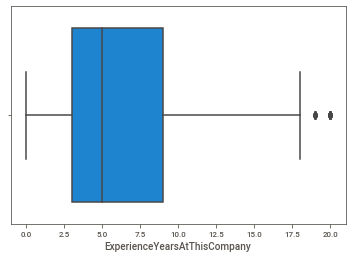

In [73]:
# Checking for outliers again using boxplot

sns.boxplot(data1.ExperienceYearsAtThisCompany)
#Insight: Outlier are still there so applying iqr for the "ExperienceYearsAtThisCompany" feature again

In [74]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['ExperienceYearsAtThisCompany'], interpolation = 'midpoint') 

IQR

6.0

In [75]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['ExperienceYearsAtThisCompany'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['ExperienceYearsAtThisCompany'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [76]:
min_limit

-6.0

In [77]:
max_limit

18.0

In [78]:
data1.loc[data1['ExperienceYearsAtThisCompany']>max_limit]

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
72     51  Female           Marketing       Married                   Sales   
142    47    Male             Medical      Divorced             Development   
207    38  Female       Life Sciences       Married  Research & Development   
211    44    Male             Medical       Married         Human Resources   
230    40    Male             Medical        Single  Research & Development   
283    44    Male               Other        Single  Research & Development   
330    39  Female             Medical      Divorced  Research & Development   
340    41    Male             Medical        Single                   Sales   
341    55  Female             Medical       Married  Research & Development   
360    55    Male           Marketing        Single                   Sales   
361    56    Male       Life Sciences       Married  Research & Development   
377    43  Female             Medical        Single  Research & Development   
381    42  Female     Human Resources       Married         Human Resources   
387    54  Female             Medical        Single  Research & Development   
456    42    Male       Life Sciences       Married  Research & Development   
639    46  Female    Technical Degree      Divorced                   Sales   
655    40    Male       Life Sciences      Divorced  Research & Development   
677    38  Female             Medical      Divorced  Research & Development   
705    39    Male           Marketing        Single                   Sales   
706    42    Male       Life Sciences        Single  Research & Development   
742    41  Female       Life Sciences       Married  Research & Development   
758    39  Female           Marketing       Married                   Sales   
864    51    Male       Life Sciences        Single             Development   
918    40  Female             Medical       Married             Development   
925    45    Male             Medical       Married             Development   
946    45  Female             Medical        Single                   Sales   
973    39  Female    Technical Degree        Single             Development   
988    45    Male             Medical       Married             Development   
999    42    Male       Life Sciences       Married                   Sales   
1010   42  Female           Marketing       Married                   Sales   
1109   40  Female       Life Sciences       Married                   Sales   
1197   50    Male             Medical       Married             Development   

                     EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
72                      Manager           Travel_Rarely                26   
142            Senior Developer       Travel_Frequently                16   
207   Healthcare Representative           Travel_Rarely                17   
211             Human Resources           Travel_Rarely                 1   
230                 Manager R&D           Travel_Rarely                14   
283          Research Scientist           Travel_Rarely                29   
330                     Manager           Travel_Rarely                13   
340             Sales Executive              Non-Travel                10   
341                     Manager           Travel_Rarely                 2   
360             Sales Executive           Travel_Rarely                13   
361                 Manager R&D           Travel_Rarely                23   
377          Research Scientist           Travel_Rarely                 6   
381                     Manager           Travel_Rarely                10   
387           Research Director           Travel_Rarely                 1   
456   Healthcare Representative       Travel_Frequently                 2   
639             Sales Executive           Travel_Rarely                 3   
655                 Manager R&D           Travel_Rarely                 1   
677         

In [79]:
## imputing the outliers as the count is high
data1.loc[data1['ExperienceYearsAtThisCompany'] > max_limit,'ExperienceYearsAtThisCompany']=np.median(data1['ExperienceYearsAtThisCompany'])

In [80]:
data1.loc[data1['ExperienceYearsAtThisCompany']>max_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [81]:
#so outliers get removed

### Checking Outlier For The Feature "ExperienceYearsInCurrentRole"

<AxesSubplot:xlabel='ExperienceYearsInCurrentRole', ylabel='Density'>

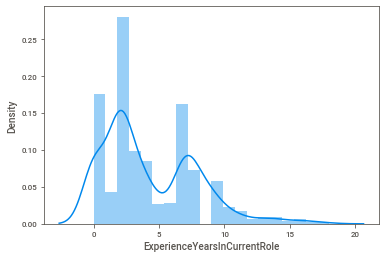

In [82]:
sns.distplot(data1.ExperienceYearsInCurrentRole)
# Data is not normally distributed. So, outlier treatment is necessary

<AxesSubplot:xlabel='ExperienceYearsInCurrentRole'>

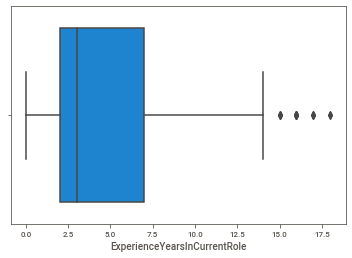

In [83]:
sns.boxplot(data1.ExperienceYearsInCurrentRole)

#Outlier treatment required 

### Removing Outlier For "ExperienceYearsInCurrentRole" Feature Using IQR

In [84]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['ExperienceYearsInCurrentRole'], interpolation = 'midpoint') 

IQR


5.0

In [85]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['ExperienceYearsInCurrentRole'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['ExperienceYearsInCurrentRole'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [86]:
min_limit

-5.5

In [87]:
#filtering the data
data1.loc[data1['ExperienceYearsInCurrentRole']<min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [88]:
max_limit

14.5

In [89]:
data1.loc[data1['ExperienceYearsInCurrentRole']>max_limit]

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
151    41    Male             Medical      Divorced             Development   
175    41  Female       Life Sciences      Divorced  Research & Development   
272    46  Female           Marketing       Married                   Sales   
361    56    Male       Life Sciences       Married  Research & Development   
501    35    Male       Life Sciences       Married                 Finance   
555    45    Male       Life Sciences       Married  Research & Development   
639    46  Female    Technical Degree      Divorced                   Sales   
658    48  Female             Medical      Divorced  Research & Development   
730    38  Female             Medical       Married  Research & Development   
817    59  Female       Life Sciences        Single                   Sales   
864    51    Male       Life Sciences        Single             Development   
921    52    Male       Life Sciences       Married             Development   
956    42    Male    Technical Degree       Married             Development   
999    42    Male       Life Sciences       Married                   Sales   
1109   40  Female       Life Sciences       Married                   Sales   
1152   41  Female       Life Sciences       Married                   Sales   

             EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
151           Developer       Travel_Frequently                 9   
175   Research Director              Non-Travel                 7   
272             Manager           Travel_Rarely                 2   
361         Manager R&D           Travel_Rarely                23   
501     Finance Manager           Travel_Rarely                18   
555         Manager R&D              Non-Travel                 1   
639     Sales Executive           Travel_Rarely                 3   
658             Manager       Travel_Frequently                22   
730   Research Director           Travel_Rarely                10   
817     Sales Executive           Travel_Rarely                25   
864           Developer           Travel_Rarely                 6   
921           Developer           Travel_Rarely                 1   
956           Developer           Travel_Rarely                 4   
999     Sales Executive           Travel_Rarely                 1   
1109            Manager           Travel_Rarely                 2   
1152            Manager           Travel_Rarely                 2   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
151                   3                           1             64   
175                   1                           2             55   
272                   3                           3             69   
361                   3                           4             68   
501                   5                           2             48   
555                   1                           3             74   
639                   3                           1             45   
658                   3                           4             58   
730                   3                           2             99   
817                   3                           1             99   
864                   3                           1             51   
921                   4                           3             65   
956                   2                           3             58   
999                   1                           2             99   
1109                  4                           3             79   
1152                  5                           2             91   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
151                   3            5                   3                 2.0   
175                   1            5                   3                 1.0   
272                   3            4                   1 

In [90]:
## imputing the outliers as the count is high
data1.loc[data1['ExperienceYearsInCurrentRole'] > max_limit,'ExperienceYearsInCurrentRole']=np.median(data1['ExperienceYearsInCurrentRole'])


<AxesSubplot:xlabel='ExperienceYearsInCurrentRole'>

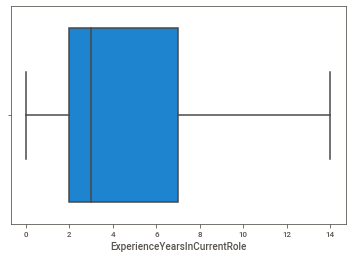

In [91]:
# Checking for outliers again using boxplot

sns.boxplot(data1.ExperienceYearsInCurrentRole)
#Insight: Outlier has been removed for the "ExperienceYearsInCurrentRole" feature

### Checking Outlier For The Feature "YearsSinceLastPromotion"

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='Density'>

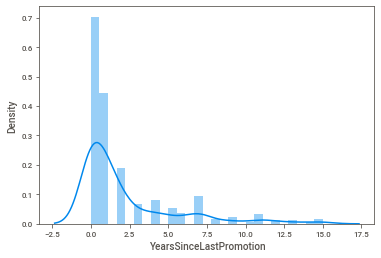

In [92]:
sns.distplot(data1.YearsSinceLastPromotion)
# Data is not normally distributed. So, outlier treatment is necessary


In [93]:
sns.boxplot(data1.YearsSinceLastPromotion)

#Outlier treatment required 

<AxesSubplot:xlabel='YearsSinceLastPromotion'>

### Removing Outlier For "YearsSinceLastPromotion" Feature Using IQR

In [94]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['YearsSinceLastPromotion'], interpolation = 'midpoint') 

IQR

3.0

In [95]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['YearsSinceLastPromotion'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['YearsSinceLastPromotion'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [96]:
min_limit

-4.5

In [97]:
#filtering the data
data1.loc[data1['YearsSinceLastPromotion']<min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [98]:
max_limit

7.5

In [99]:
data1.loc[data1['YearsSinceLastPromotion']>max_limit]

Age  Gender EducationBackground MaritalStatus    EmpDepartment  \
3      41    Male     Human Resources      Divorced  Human Resources   
11     47  Female             Medical      Divorced            Sales   
100    50    Male       Life Sciences      Divorced      Development   
130    31  Female             Medical       Married      Development   
132    37    Male       Life Sciences       Married            Sales   
...   ...     ...                 ...           ...              ...   
1152   41  Female       Life Sciences       Married            Sales   
1160   50    Male             Medical       Married  Human Resources   
1181   34    Male       Life Sciences       Married      Development   
1185   35    Male       Life Sciences        Single      Development   
1189   33    Male       Life Sciences        Single      Development   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
3              Manager           Travel_Rarely                10   
11     Sales Executive       Travel_Frequently                 3   
100          Developer              Non-Travel                 2   
130          Developer           Travel_Rarely                12   
132    Sales Executive           Travel_Rarely                 1   
...                ...                     ...               ...   
1152           Manager           Travel_Rarely                 2   
1160           Manager       Travel_Frequently                 3   
1181  Senior Developer           Travel_Rarely                 1   
1185  Senior Developer           Travel_Rarely                 6   
1189  Senior Developer       Travel_Frequently                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
3                     4                           2             73   
11                    3                           4             49   
100                   4                           1             98   
130                   3                           4             41   
132                   4                           1             46   
...                 ...                         ...            ...   
1152                  5                           2             91   
1160                  3                           1             99   
1181                  5                           2             42   
1185                  4                           2             82   
1189                  3                           1             70   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
3                     2            5                   4                 3.0   
11                    3            4                   3                 2.0   
100                   3            4                   1                 1.0   
130                   3            2                   4                 0.0   
132                   2            3                   3                 5.0   
...                 ...          ...                 ...                 ...   
1152                  3            4                   1                 7.0   
1160                  3            5                   2                 1.0   
1181                  3            1                   4                 1.0   
1185                  1            2                   4                 1.0   
1189                  3            1                   1                 1.0   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
3          No                        15                            2   
11        Yes                        12                            4   
100        No                        11                            4   
130       Yes                        11                            3   
132        No                        11                            3   
...       ...                       ...                          ...   
1152       No     

In [100]:
# so no of rows containing  outliers more than 5% .so no treatment required.

### Checking Outlier For The Feature "YearsWithCurrManager"

In [101]:
sns.distplot(data1.YearsWithCurrManager)
# Data is not normally distributed. So, outlier treatment is necessary


<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='Density'>

<AxesSubplot:xlabel='YearsWithCurrManager'>

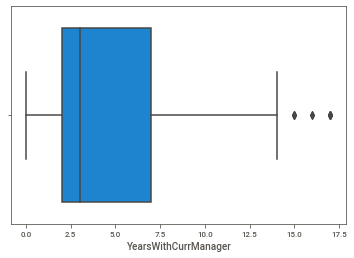

In [102]:
sns.boxplot(data1.YearsWithCurrManager)

#Outlier treatment required

### Removing Outlier For "YearsWithCurrManager" Feature Using IQR

In [103]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(data1['YearsWithCurrManager'], interpolation = 'midpoint') 

IQR


5.0

In [104]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = data1['YearsWithCurrManager'].quantile(0.25)
# Third quartile (Q3) 
Q3 = data1['YearsWithCurrManager'].quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [105]:
min_limit

-5.5

In [106]:
#filtering the data
data1.loc[data1['YearsWithCurrManager']<min_limit]

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [107]:
max_limit

14.5

In [108]:
data1.loc[data1['YearsWithCurrManager']>max_limit]

Age  Gender EducationBackground MaritalStatus           EmpDepartment  \
25     52    Male           Marketing       Married                   Sales   
72     51  Female           Marketing       Married                   Sales   
126    41    Male             Medical        Single             Development   
283    44    Male               Other        Single  Research & Development   
320    43  Female           Marketing        Single                   Sales   
655    40    Male       Life Sciences      Divorced  Research & Development   
785    44  Female             Medical       Married             Development   
864    51    Male       Life Sciences        Single             Development   
888    45    Male       Life Sciences      Divorced             Development   
956    42    Male    Technical Degree       Married             Development   
1083   37  Female       Life Sciences      Divorced             Development   

              EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
25               Manager           Travel_Rarely                 3   
72               Manager           Travel_Rarely                26   
126            Developer           Travel_Rarely                 6   
283   Research Scientist           Travel_Rarely                29   
320      Sales Executive           Travel_Rarely                 4   
655          Manager R&D           Travel_Rarely                 1   
785            Developer           Travel_Rarely                 7   
864            Developer           Travel_Rarely                 6   
888            Developer           Travel_Rarely                 9   
956            Developer           Travel_Rarely                 4   
1083    Delivery Manager           Travel_Rarely                14   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
25                    4                           3             31   
72                    4                           1             66   
126                   3                           4             59   
283                   4                           4             32   
320                   4                           4             56   
655                   4                           1             98   
785                   4                           1             42   
864                   3                           1             51   
888                   3                           2             60   
956                   2                           3             58   
1083                  3                           4             95   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
25                    2            4                   1                 1.0   
72                    3            4                   3                 2.0   
126                   3            1                   1                 2.0   
283                   3            2                   4                 1.0   
320                   2            3                   4                 3.0   
655                   3            4                   1                 2.0   
785                   2            3                   4                 3.0   
864                   3            5                   3                 7.0   
888                   3            2                   2                 8.0   
956                   3            5                   4                 1.0   
1083                  3            1                   1                 1.0   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
25         No                        11                            1   
72         No                        14                            3   
126       Yes                        13                            3   
283        No                        25                            2   
320        No                        14               

In [109]:
## imputing the outliers as the count is high
data1.loc[data1['YearsWithCurrManager'] > max_limit,'YearsWithCurrManager']=np.median(data1['YearsWithCurrManager'])

<AxesSubplot:xlabel='YearsWithCurrManager'>

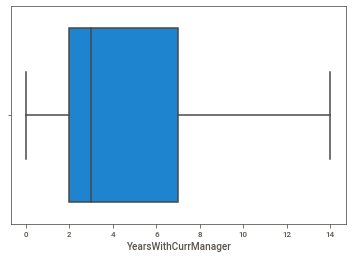

In [110]:
# Checking for outliers again using boxplot

sns.boxplot(data1.YearsWithCurrManager)
#Insight: Outlier has been removed for the "YearsWithCurrManager" feature

In [111]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1200 non-null   int64  
 1   Gender                        1200 non-null   object 
 2   EducationBackground           1200 non-null   object 
 3   MaritalStatus                 1200 non-null   object 
 4   EmpDepartment                 1200 non-null   object 
 5   EmpJobRole                    1200 non-null   object 
 6   BusinessTravelFrequency       1200 non-null   object 
 7   DistanceFromHome              1200 non-null   int64  
 8   EmpEducationLevel             1200 non-null   int64  
 9   EmpEnvironmentSatisfaction    1200 non-null   int64  
 10  EmpHourlyRate                 1200 non-null   int64  
 11  EmpJobInvolvement             1200 non-null   int64  
 12  EmpJobLevel                   1200 non-null   int64  
 13  Emp

In [112]:
data1.columns

Index(['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

## Conversion of categorical features to numerical - Manual Encoding

In [113]:
# for most of the features labels are more than 5 so one-hot encoding and label encoding are tedious task.
#so manual encoding is used for this reason.

### For Feature "Gender"

In [114]:
data1.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [115]:
## Conversion of categorical data to numeric equivalent for the feature "Gender" - Manual encoding 
data1.Gender = data1.Gender.map({'Male':1,'Female':2})

In [116]:
## Converting the datatypes of categorical feature 'Gender'
data1['Gender'] = data1['Gender'].astype('int64')

### For Feature "EducationBackground"

In [117]:
data1.EducationBackground.unique()

array(['Marketing', 'Life Sciences', 'Human Resources', 'Medical',
       'Other', 'Technical Degree'], dtype=object)

In [118]:
## Conversion of categorical data to numeric equivalent for the feature "EducationBackground" - Manual encoding 
data1.EducationBackground= data1.EducationBackground.map({'Human Resources':1,'Other':2,'Technical Degree':3,'Marketing':4,'Medical':5,'Life Sciences':6})

In [119]:
data1['EducationBackground'] = data1['EducationBackground'].astype('int64')

### For Feature "MaritalStatus"

In [120]:
data1.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [121]:
## Conversion of categorical data to numeric equivalent for the feature "MaritalStatus" - Manual encoding 
data1.MaritalStatus = data1.MaritalStatus.map({'Divorced':1,'Single':2,'Married':3,})

In [122]:
## Converting the datatypes of categorical feature 'MaritalStatus'
data1['MaritalStatus'] = data1['MaritalStatus'].astype('int64')

### For Feature "EmpDepartment"

In [123]:
data.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

In [124]:
## Conversion of categorical data to numeric equivalent for the feature "EmpDepartment" - Manual encoding 
data1.EmpDepartment = data1.EmpDepartment.map({'Data Science':1,'Finance':2,'Human Resources':3,'Research & Development':4,'Development':5,'Sales':6})

In [125]:
## Converting the datatypes of categorical feature 'EmpDepartment'
data1['EmpDepartment'] = data1['EmpDepartment'].astype('int64')

### For Feature "EmpJobRole"

In [126]:
data.EmpJobRole.unique()

array(['Sales Executive', 'Manager', 'Developer', 'Sales Representative',
       'Human Resources', 'Senior Developer', 'Data Scientist',
       'Senior Manager R&D', 'Laboratory Technician',
       'Manufacturing Director', 'Research Scientist',
       'Healthcare Representative', 'Research Director', 'Manager R&D',
       'Finance Manager', 'Technical Architect', 'Business Analyst',
       'Technical Lead', 'Delivery Manager'], dtype=object)

In [127]:
## Conversion of categorical data to numeric equivalent for the feature "EmpJobRole" - Manual encoding 
data1.EmpJobRole = data1.EmpJobRole.map({'Delivery Manager':1,'Technical Architect':2,'Senior Manager R&D':3,'Business Analyst':4,'Research Director':5,'Data Scientist':6,'Healthcare Representative':7,'Manufacturing Director':8,'Technical Lead':9,'Human Resources':10,'Finance Manager':11,
'Manager':12,'Senior Developer':13,'Laboratory Technician':14,'Sales Representative':15,'Research Scientist':16,'Manager R&D':17,'Developer':18,'Sales Executive':19})


In [128]:
## Converting the datatypes of categorical feature 'EmpJobRole'
data1['EmpJobRole'] = data1['EmpJobRole'].astype('int64')

### For Feature "BusinessTravelFrequency"

In [129]:
data.BusinessTravelFrequency.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [130]:
## Conversion of categorical data to numeric equivalent for the feature "BusinessTravelFrequency" - Manual encoding 
data1.BusinessTravelFrequency = data1.BusinessTravelFrequency.map({'Non-Travel':1,'Travel_Frequently':2,'Travel_Rarely':3})


In [131]:
## Converting the datatypes of categorical feature 'BusinessTravelFrequency'
data1['BusinessTravelFrequency'] = data1['BusinessTravelFrequency'].astype('int64')

### For Feature "OverTime"

In [132]:
data.OverTime.unique()

array(['No', 'Yes'], dtype=object)

In [133]:
## Conversion of categorical data to numeric equivalent for the feature "OverTime" - Manual encoding 
data1.OverTime = data1.OverTime.map({'Yes':1,'No':2})

In [134]:
## Converting the datatypes of categorical feature 'OverTime'
data1['OverTime'] = data1['OverTime'].astype('int64')

### For Feature "Attrition"

In [135]:
data.Attrition.unique()

array(['No', 'Yes'], dtype=object)

In [136]:
## Conversion of categorical data to numeric equivalent for the feature "Attrition" - Manual encoding 
data1.Attrition = data1.Attrition.map({'Yes':1,'No':2})

In [137]:
## Converting the datatypes of categorical feature 'Attrition'
data1['Attrition'] = data1['Attrition'].astype('int64')

In [138]:
data1

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       1                    4              2              6   
1      47       1                    4              2              6   
2      40       1                    6              3              6   
3      41       1                    1              1              3   
4      60       1                    4              2              6   
...   ...     ...                  ...            ...            ...   
1195   27       2                    5              1              6   
1196   37       1                    6              2              5   
1197   50       1                    5              3              5   
1198   34       2                    5              2              1   
1199   24       2                    6              2              6   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             19                        3                10   
1             19                        3                14   
2             19                        2                 5   
3             12                        3                10   
4             19                        3                16   
...          ...                      ...               ...   
1195          19                        2                 3   
1196          13                        3                10   
1197          13                        3                28   
1198           6                        3                 9   
1199          19                        3                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                     3                           4             55   
1                     4                           4             42   
2                     4                           4             48   
3                     4                           2             73   
4                     4                           1             84   
...                 ...                         ...            ...   
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                     3            2                   4                 1.0   
1                     3            2                   1                 2.0   
2                     2            3                   1                 5.0   
3                     2            5                   4                 3.0   
4                     3            2                   1                 8.0   
...                 ...          ...                 ...                 ...   
1195                  4            2                   4                 1.0   
1196                  4            1                   4                 3.0   
1197                  4            1                   3                 1.0   
1198                  2            3                   2                 1.0   
1199                  3            2                   3                 2.0   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            2                        12                            4   
1            2                        12                            4   
2            1                        21                            3   
3            2                        15                            2   
4            2                        14                            4   
...        ...                       ...                          ...   
1195         1                        20                            2  

In [139]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1200 non-null   int64  
 1   Gender                        1200 non-null   int64  
 2   EducationBackground           1200 non-null   int64  
 3   MaritalStatus                 1200 non-null   int64  
 4   EmpDepartment                 1200 non-null   int64  
 5   EmpJobRole                    1200 non-null   int64  
 6   BusinessTravelFrequency       1200 non-null   int64  
 7   DistanceFromHome              1200 non-null   int64  
 8   EmpEducationLevel             1200 non-null   int64  
 9   EmpEnvironmentSatisfaction    1200 non-null   int64  
 10  EmpHourlyRate                 1200 non-null   int64  
 11  EmpJobInvolvement             1200 non-null   int64  
 12  EmpJobLevel                   1200 non-null   int64  
 13  Emp

## Feature Selection

<AxesSubplot:>

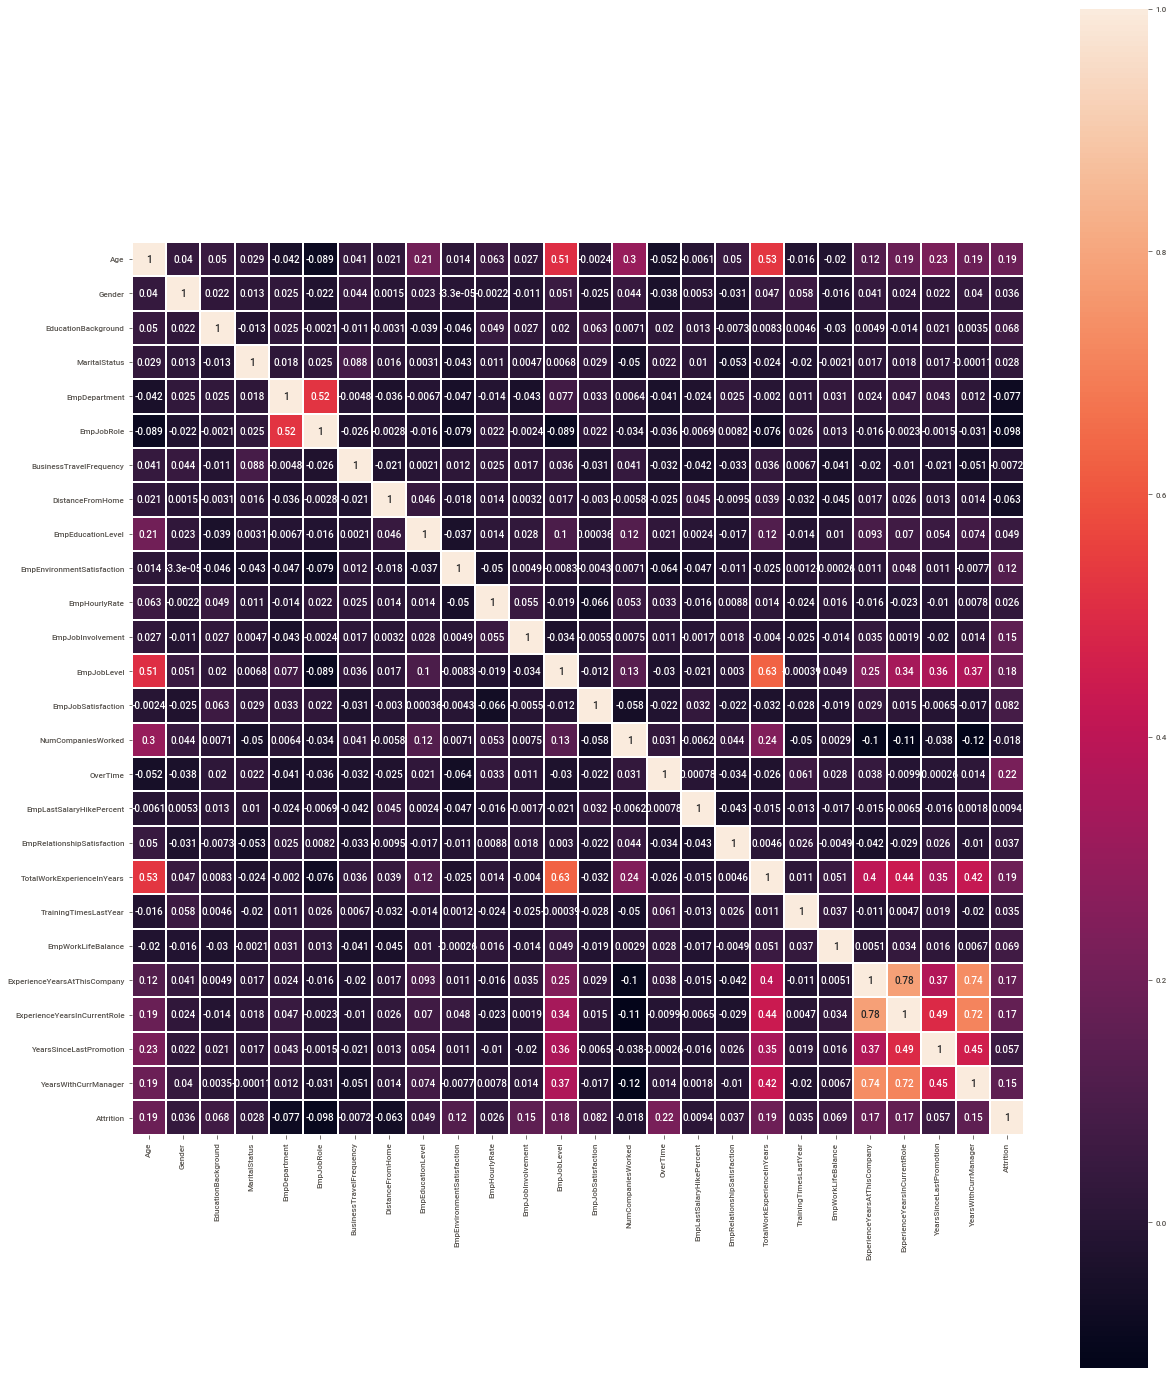

In [140]:
plt.figure(figsize=(20,25))
sns.heatmap(data1.drop('PerformanceRating',axis=1).corr(),annot=True,square=True,linewidths=1 , linecolor= 'white')

In [141]:
# ## NO correlated features are present

## Model Building

In [142]:
data1.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    4              2              6          19   
1   47       1                    4              2              6          19   
2   40       1                    6              3              6          19   
3   41       1                    1              1              3          12   
4   60       1                    4              2              6          19   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        3                10                  3   
1                        3                14                  4   
2                        2                 5                  4   
3                        3                10                  4   
4                        3                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                 1.0         2                        12   
1                   1                 2.0         2                        12   
2                   1                 5.0         1                        21   
3                   4                 3.0         2                        15   
4                   1                 8.0         2                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                        10.0   
1                            4                        20.0   
2                            3                        20.0   
3                            2                        23.0   
4                            4                        10.0   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                          10.0   
1                      2                   3                           7.0   
2                      2                   3                          18.0   
3                      2                   2                           5.0   
4                      1                   3                           2.0   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                           7.0                        0   
1                           7.0                        1   
2                          13.0                        1   
3                           6.0                       12   
4                           2.0                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                   8.0          2                  3  
1                   7.0          2                  3  
2                  12.0          2                  4  
3                   6.0          2                  3  
4                   2.0          2                  3

In [143]:
# check if there is any imbalance with response variable.
data1.groupby('PerformanceRating').size()

# Since we have imbalanced data, we may have to sub-sample the data /over sample/ create synthetic data using SMOTE()
# we will try using first with SMOTE() and check the accuracy scores with different models going to be built now.

PerformanceRating
2    194
3    874
4    132
dtype: int64

In [144]:
# define data
X = data1.iloc[ : , 0:-1 ]
y = data1['PerformanceRating']
rl = []

In [145]:
# Scale the data
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [146]:
## SMOTE() the data
from imblearn.over_sampling import SMOTE
smote = SMOTE() # create object smote

In [147]:
X_smote, y_smote = smote.fit_resample(X,y)

In [148]:
X_smote

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0      32       1                    4              2              6   
1      47       1                    4              2              6   
2      40       1                    6              3              6   
3      41       1                    1              1              3   
4      60       1                    4              2              6   
...   ...     ...                  ...            ...            ...   
2617   29       1                    5              2              5   
2618   29       1                    4              2              6   
2619   43       2                    4              2              5   
2620   30       1                    6              1              5   
2621   36       1                    6              2              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             19                        3                10   
1             19                        3                14   
2             19                        2                 5   
3             12                        3                10   
4             19                        3                16   
...          ...                      ...               ...   
2617          18                        1                 4   
2618          19                        1                 5   
2619           9                        3                13   
2620          18                        3                 3   
2621          15                        3                 1   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                     3                           4             55   
1                     4                           4             42   
2                     4                           4             48   
3                     4                           2             73   
4                     4                           1             84   
...                 ...                         ...            ...   
2617                  3                           2             43   
2618                  3                           2             43   
2619                  3                           4             78   
2620                  3                           3             44   
2621                  3                           3             70   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                     3            2                   4            1.000000   
1                     3            2                   1            2.000000   
2                     2            3                   1            5.000000   
3                     2            5                   4            3.000000   
4                     3            2                   1            8.000000   
...                 ...          ...                 ...                 ...   
2617                  3            1                   3            1.599970   
2618                  2            2                   3            1.434077   
2619                  2            3                   3            5.953805   
2620                  1            2                   4            2.333098   
2621                  3            1                   4            3.000000   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            2                        12                            4   
1            2                        12                            4   
2            1                        21                            3   
3            2                        15                            2   
4            2                        14                            4   
...        ...                       ...                          ...   
2617         2                        16                            1  

In [149]:
# split data into train and test
from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state = 42)
X_train,X_test,y_train,y_test=train_test_split(X_smote, y_smote, test_size=0.20, random_state=42)

# PCA

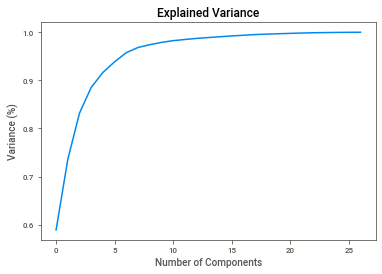

In [150]:
## getting the optimal number of pca
from sklearn.decomposition import PCA
pca = PCA()
principalComponents = pca.fit_transform(data1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [151]:
pca = PCA(n_components=10)
new_data = pca.fit_transform(data1)
# This will be the new data fed to the algorithm.
principal_data1 = pd.DataFrame(data = new_data, columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5', 'principal component 6','principal component 7','principal component 8','principal component 9', 'principal component 10'])

In [152]:
principal_data1.head()

principal component 1  principal component 2  principal component 3  \
0              11.143875              -2.936605               1.211844   
1              23.468934              14.654012               4.027077   
2              17.831982              10.944090              -4.199741   
3              -7.227366              10.961336               0.352123   
4             -18.967363              18.535286               4.944719   

   principal component 4  principal component 5  principal component 6  \
0               6.615671              -4.185816               1.487847   
1               2.080380              -4.997215              -3.614742   
2              15.186599              -4.451701               0.981806   
3               7.047257               2.867174              -6.589968   
4             -13.835238              -6.099426               2.541140   

   principal component 7  principal component 8  principal component 9  \
0              -3.172005              -3.950871              -0.902585   
1              -3.051238              -2.713212              -1.969013   
2               6.184809              -7.067880               3.085236   
3               0.085292               8.787322              -0.388701   
4              -1.459583               0.022141               3.651228   

   principal component 10  
0               -1.000596  
1               -0.732222  
2               -0.522676  
3               -0.259241  
4               -1.584447

In [153]:
# After implementing PCA in all the models it was observed that the scores like accuracy,precision,recall and f1 slightly improved
# so it is better to use PCA.

#### Logistic Regression

In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score, \
classification_report,roc_auc_score, roc_curve
log_reg = LogisticRegression()

In [155]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [156]:
y_hat = log_reg.predict(X_test)

In [157]:
# F1 Score
F1_Score = f1_score(y_test,y_hat,average='weighted')
F1_Score

0.7959376000754452

In [158]:
# accuracy
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.7980952380952381

In [159]:
# Precison
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.797581090157582

In [160]:
# Recall
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.7980952380952381

In [161]:
pd.crosstab(y_test, y_hat)

col_0                2    3    4
PerformanceRating               
2                  142   25   17
3                   29  123   21
4                    4   10  154

In [162]:
rep=classification_report(y_test, y_hat)
print(rep)

              precision    recall  f1-score   support

           2       0.81      0.77      0.79       184
           3       0.78      0.71      0.74       173
           4       0.80      0.92      0.86       168

    accuracy                           0.80       525
   macro avg       0.80      0.80      0.80       525
weighted avg       0.80      0.80      0.80       525



In [163]:
rl.append(['LR',F1_Score, accuracy, Precision, Recall])

#### SVM

In [164]:
from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(X_train, y_train)

SVC()

In [165]:
## henceforth all output from predict will be assigned to y_hat in all classifiers for easy understanding of code.
y_hat=svclassifier.predict(X_test)

In [166]:
## evaluating the model created
from sklearn.metrics import accuracy_score,classification_report,f1_score
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(svclassifier, X_scaled, y, scoring='accuracy', cv = 3)
print("Accuracy of Model with Cross Validation is:",accuracy.mean() * 100)

Accuracy of Model with Cross Validation is: 77.0


In [167]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.68      0.67      0.68       184
           3       0.67      0.51      0.58       173
           4       0.71      0.90      0.79       168

    accuracy                           0.69       525
   macro avg       0.69      0.69      0.68       525
weighted avg       0.69      0.69      0.68       525



In [168]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.6895238095238095

In [169]:
F1_Score=f1_score(y_test,y_hat,average='weighted')
F1_Score

0.6806215181241753

In [170]:
rl.append(['SVM',F1_Score, accuracy, Precision, Recall])


#### KNN

In [171]:
from sklearn.neighbors import KNeighborsClassifier

In [172]:
## taking optimal k (k = 10)
error_rate = []
# Will try
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

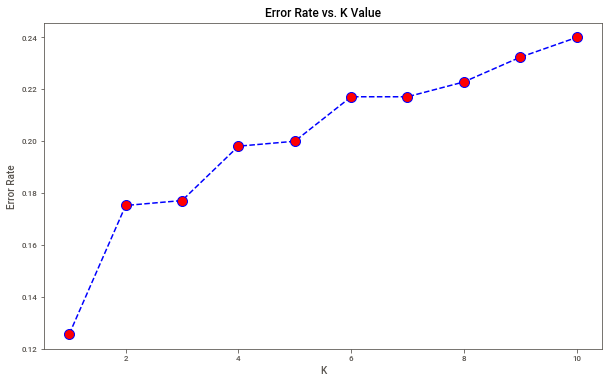

In [173]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [174]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [175]:
# Prediction
y_hat = knn.predict(X_test)

In [176]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[182,   1,   1],
       [ 67,  82,  24],
       [  0,   0, 168]], dtype=int64)

In [177]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.8228571428571428

In [178]:
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.8602742180168985

In [179]:
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.8228571428571428

In [180]:
# F1 Score
F1_Score = f1_score(y_test,y_hat,average='weighted')
F1_Score

0.803567161529995

In [181]:
print("The accuracy score is : ", accuracy_score(y_test,y_hat))

The accuracy score is :  0.8228571428571428


In [182]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.73      0.99      0.84       184
           3       0.99      0.47      0.64       173
           4       0.87      1.00      0.93       168

    accuracy                           0.82       525
   macro avg       0.86      0.82      0.80       525
weighted avg       0.86      0.82      0.80       525



In [183]:
rl.append(['KNN',F1_Score, accuracy, Precision, Recall])

#### Naive Bays

In [184]:
# BernoulliNB
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB(alpha=0.01) # object creation
nb.fit(X_train,y_train)

BernoulliNB(alpha=0.01)

In [185]:
y_hat=nb.predict(X_test)

In [186]:
from sklearn.metrics import classification_report,confusion_matrix

In [187]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.51      0.98      0.67       184
           3       0.51      0.19      0.28       173
           4       0.57      0.37      0.45       168

    accuracy                           0.52       525
   macro avg       0.53      0.51      0.47       525
weighted avg       0.53      0.52      0.47       525



In [188]:
pd.crosstab(y_test,y_hat)

col_0                2   3   4
PerformanceRating             
2                  180   3   1
3                   94  33  46
4                   77  29  62

In [189]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[180,   3,   1],
       [ 94,  33,  46],
       [ 77,  29,  62]], dtype=int64)

In [190]:
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.5238095238095238

In [191]:
Precision = precision_score(y_test,y_hat,average='weighted')
Precision


0.5290464316519361

In [192]:
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.5238095238095238

In [193]:
F1_Score=f1_score(y_test,y_hat,average='weighted')
F1_Score

0.4704640956217164

In [194]:
rl.append(['Naive bays',F1_Score, accuracy, Precision, Recall])

#### Decision Tree

In [195]:
#  decisiontree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [196]:
y_hat=dt.predict(X_test)

In [197]:
#from sklearn.metrics import accuracy_score,classification_report,f1_score
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[171,   6,   7],
       [  8, 150,  15],
       [  3,   9, 156]], dtype=int64)

In [198]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9085714285714286

In [199]:
# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.9093101013486248

In [200]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9085714285714286

In [201]:
F1_Score=f1_score(y_test, y_hat,average='weighted')
F1_Score

0.9085258125090765

In [202]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.94      0.93      0.93       184
           3       0.91      0.87      0.89       173
           4       0.88      0.93      0.90       168

    accuracy                           0.91       525
   macro avg       0.91      0.91      0.91       525
weighted avg       0.91      0.91      0.91       525



In [203]:
rl.append(['Decision Tree',F1_Score, accuracy, Precision, Recall])

#### Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [205]:
y_hat=rf_clf.predict(X_test)

In [206]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           2       0.94      0.99      0.97       184
           3       0.98      0.91      0.94       173
           4       0.96      0.97      0.97       168

    accuracy                           0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [207]:
F1_Score=f1_score(y_test,y_hat,average='weighted')
F1_Score

0.9578013207451689

In [208]:
#confusion metrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[183,   1,   0],
       [ 10, 157,   6],
       [  2,   3, 163]], dtype=int64)

In [209]:
## calculating accuracy
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9580952380952381

In [210]:
# Precison - among all the positive predictions, how many of them actually positive
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.9588843607419815

In [211]:
# Recall - from the total positive results , how many positives are correctly predicted by the model
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9580952380952381

In [212]:
F1_Score = f1_score(y_test,y_hat,average='weighted')
F1_Score  

0.9578013207451689

In [213]:
rl.append(['Random Forest',F1_Score, accuracy, Precision, Recall])

#### Gradient Boosting

In [214]:
## importing the model library
from sklearn.ensemble import  GradientBoostingClassifier
gbm=GradientBoostingClassifier()
gbm.fit(X_train,y_train) ## fitting the data
y_hat=gbm.predict(X_test)

In [215]:
#confusion metrix - not applicable , since they cant handle continous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[181,   2,   1],
       [ 11, 158,   4],
       [  5,   3, 160]], dtype=int64)

In [216]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9504761904761905

In [217]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.951729866678638

In [218]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9504761904761905

In [219]:
# F1 Score
F1_Score = f1_score(y_test,y_hat,average='weighted')
F1_Score

0.9504151797627614

In [220]:
#y_hat

In [221]:
len(X_train)

2097

In [222]:
len(X_test)

525

In [223]:
## evaluatin the model
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_hat)
print(r2)

0.8748265996185192


In [224]:
X_test.shape

(525, 26)

In [225]:
#adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.8732543733335344

In [226]:
rl.append(['Gradient boosting',F1_Score, accuracy, Precision, Recall])

#### XGBOOST

In [227]:
import xgboost 

In [228]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 1760 to 860
Data columns (total 26 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           2097 non-null   int64  
 1   Gender                        2097 non-null   int64  
 2   EducationBackground           2097 non-null   int64  
 3   MaritalStatus                 2097 non-null   int64  
 4   EmpDepartment                 2097 non-null   int64  
 5   EmpJobRole                    2097 non-null   int64  
 6   BusinessTravelFrequency       2097 non-null   int64  
 7   DistanceFromHome              2097 non-null   int64  
 8   EmpEducationLevel             2097 non-null   int64  
 9   EmpEnvironmentSatisfaction    2097 non-null   int64  
 10  EmpHourlyRate                 2097 non-null   int64  
 11  EmpJobInvolvement             2097 non-null   int64  
 12  EmpJobLevel                   2097 non-null   int64  
 13  E

In [229]:
## model creation
from xgboost import XGBClassifier
xgb_c=XGBClassifier()
xgb_c.fit(X_train,y_train)
y_hat=xgb_c.predict(X_test)

[21:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [230]:
#confusion metrix - not applicable , since they cant handle continous and binary output
#from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_hat)
confusion_matrix

array([[182,   2,   0],
       [  8, 161,   4],
       [  2,   4, 162]], dtype=int64)

In [231]:
## calculating accuracy- not applicable , since they cant handle continous and binary output
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
accuracy = accuracy_score(y_test,y_hat)
accuracy

0.9619047619047619

In [232]:
# Precison - among all the positive predictions, how many of them actually positive?
# = TP/(TP+FP)
Precision = precision_score(y_test,y_hat,average='weighted')
Precision

0.9621960095872512

In [233]:
# Recall - from the total positive results , how many positives are correctly predicted by the model?
#= TP/(TP+FN)
Recall = recall_score(y_test,y_hat,average='weighted')
Recall

0.9619047619047619

In [234]:
# F1 Score
F1_Score = f1_score(y_test,y_hat,average='weighted')
F1_Score

0.9617883731910396

In [235]:
r2_score(y_test,y_hat)

0.9260338997745795

In [236]:
adj_r2_score = 1-(1-r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r2_score

0.8732543733335344

In [237]:
rl.append(['XG boost',F1_Score, accuracy, Precision, Recall])

#### ----  Result analysis ----

In [238]:
res_df = pd.DataFrame(columns=['Model','F1-score','accuracy','precision','recall'],data = rl)

In [239]:
res_df

Model  F1-score  accuracy  precision    recall
0                 LR  0.795938  0.798095   0.797581  0.798095
1                SVM  0.680622  0.689524   0.797581  0.798095
2                KNN  0.803567  0.822857   0.860274  0.822857
3         Naive bays  0.470464  0.523810   0.529046  0.523810
4      Decision Tree  0.908526  0.908571   0.909310  0.908571
5      Random Forest  0.957801  0.958095   0.958884  0.958095
6  Gradient boosting  0.950415  0.950476   0.951730  0.950476
7           XG boost  0.961788  0.961905   0.962196  0.961905

In [240]:
res_df.sort_values(by='F1-score',ascending=False)

Model  F1-score  accuracy  precision    recall
7           XG boost  0.961788  0.961905   0.962196  0.961905
5      Random Forest  0.957801  0.958095   0.958884  0.958095
6  Gradient boosting  0.950415  0.950476   0.951730  0.950476
4      Decision Tree  0.908526  0.908571   0.909310  0.908571
2                KNN  0.803567  0.822857   0.860274  0.822857
0                 LR  0.795938  0.798095   0.797581  0.798095
1                SVM  0.680622  0.689524   0.797581  0.798095
3         Naive bays  0.470464  0.523810   0.529046  0.523810

Observations:
    
    1. While seeing at the data : we found that there were no presence of NaN values in the dataset. 
    2. The dataset contains 1200 rows and 28 columns. 
    3. Domain analysis : done.
    4. Univeriate analysis  - done using sweetviz.
    5. Bivariate analysis -done using various plots.
    6. While these analysis, we found that there are no such co-relations present beteween features.
    7.Treating the outliers - there are outliers in the predictors such as NumCompaniesWorked,TotalWorkExperienceInYears, 
                              ExperienceYearsAtThisCompany  etc that we have treated it using IQR function.
    8. For most of the features labels are more than 5 so one-hot encoding and label encoding are tedious task.
       so manual  encoding is used for this reason. 
    9. We have employed Standardscalar method of preprocesing library, for standardizing the predictors.
    10. SMOTE() for inflating the synthetic data as the dataset is imbalanced.
    11. We have fit several model for classification problems : using SVM, Logistic-Regression, Decision-Trees, Naive-Bays,
        Random-Forest, Gradient-Boosting algorithms.
       
    12. Out of the runs on various algorithms,we have achieved/found that XG BOOST,Random-Forest model gives highest                     F1-score of 96% approximately .

In [241]:
res_df['recall'].max()

0.9619047619047619

In [242]:
res_df['recall'].min()

0.5238095238095238

In [243]:
res_df['precision'].max()

0.9621960095872512

In [244]:
res_df['precision'].min()

0.5290464316519361

In [245]:
res_df['F1-score'].max()

0.9617883731910396

In [246]:
res_df['F1-score'].min()

0.4704640956217164

# conclusion

#### Our primary goal is to predict employee performance which will be used to hire employees.For this reason recall score is much more important.Because during hiring employees if a suitable candidate is rejected that might not hamper the organization incomparision of hiring the undeserving candidate.In the large course of time second one hamper the organisation more. As 'F1-score' is the harmonic mean  of recall and precision we can use 'F1-score' for model evaluation.

#### XG boost,Random Forest,Gradient Boosting provide recall,precision,accuracy,F1-Scores more than 95%.So we can use any one of  the models but generally XG-boost is prefered as it outperformed all  models. 


## The top 3 features effecting employee performances are:

- The features that are positively correlated are Environment Satisfaction, Last Salary Hike Percent & Worklife Balance. This means that if these factors increases, Performance Rating will increase. On the other hand, the features that are negatively correlated are Years Since Last Promotion, Experience Years at this Company, Experience years in Current Role & Years with Current Manager. This means that if these factors increases, Performance Rating will go down.Out of all the features top 3 features which effectting employees performance are.

1.	Employee Environment Satisfaction
2.	Employee Last Salary Hike Percent
3.	Years since last promotion 


## Recommendation

- Employee Environment Satisfaction is the level of happiness or contentment an employee feels for his/her job. Employee satisfaction is an essential aspect of any business or organization.company should provide a better environment as it increases the performance drastically.

- When employees are happy and satisfied with the management and work culture, they put their best effort to make the company successful.If the employees in an organization are not happy and content, it directly impacts the bottom line.shuffling the manager from time to time will also affect performance.

- When employees needs are met they develop a positive outlook towards the organization and its goals. When employees are dissatisfied and unhappy with their jobs, they lose their motivation and tend to underperform.A person earning a high salary feels motivated to do a good job, because he wants to please his employer to retain his position. His salary brings him a feeling of security, allows him to feel accomplished and gives him a high status ranking that he enjoys.So the company should increase the salary of the employee from time to time and help them maintain a worklife balance.

# Summary

The project was done with the purpose of finding out factors which affected the Performance of the employees, training a model which accurately predicts the Performance Rating of the employee, analyzing the data to provide recommendations to improve the performance and gain insights from the analysis. The following steps were carried out:

1.Understanding the business problem and project goals.

2.Import the data provided, find out the predictors & target variable and look for missing values.

3.Analysing each features in Domain Analysis.

4.EDA(Exploratory Data Analysis)
- study of each feature,its type and distribution by using univariate analysis.For this purpose sweetviz is used.
- study of each feature with the target variable by using bivariate Analysis.It helps us to understand the relationship between various predictors with the predicted feature.

5.Department wise performances done separately with its insights.

6.Data Preprocessing
- separating the numerical and catagorical features and checking outliers for numerical features.
- Treating the outliers - there are outliers in the predictors such as NumCompaniesWorked,TotalWorkExperienceInYears etc.which checked by using box-plots along with the distribution of predictors using distplots.
- the outliers have been treated with IQR function.

8.Conversion of categorical features to numerical - Manual Encoding
- For most of the features labels are 5 or more than 5 so one-hot encoding and label encoding are tedious task.
- So manual encoding is used for this reason.For model building  I also changed its data type from object to integer.

9.Feature selection
- Heat map is drawn to check the correlation among the predictors.There are no such high correlated features are present.Unique features such as 'EmpNumber' is removed in EDA part.


10.Model Building
- Before modelling the imbalance of response variable (PerformanceRating) is checked.As it is imbalaced suitable technique like
  SMOTE(synthetic Minority Over-sampling Technique) is used to convert the data set balanced one.
- For scaling the data Standard Scaler technique is used.
- PCA (Pricipal Component Analysis) is used to reduce the dimension.We see that earlier we had 26 columns, with the help of Scree plot and PCA, I have reduced the number of features to be used for model building is 10. This is the advantage of PCA.It drastically reduces the number of features, thereby considerably reducing the training time for the model.
- Training the data using algorithms like Logistic Regression, Support Vector Machine, K-Nearest Neighbor, Naive Bayes,Decision Tree, Random Forest,Gradiant Boosting and XGBoost Classifier  to find out which algorithm is the best.

11.Result Analysis
- Arranging and sorting the scores in tabular format.

12.Observations

13.Conclusion

14.Identifying top 3 features effecting employees performance

15.Recommendations
